<a href="https://colab.research.google.com/github/Eratirus/DataAnalyticsAndMachineLearningModelsAppliedToBigData/blob/main/ErickMurillo_CasoPracticoAnaliticaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Caso Práctico - Analítica de datos y modelos de aprendizaje automático aplicados a Big Data
## Nombre: Erick Murillo

## Problema 1



En el archivo "auto.csv" se encuentran los siguientes datos de distintos automóviles:

■ Cilindros.

■ Cilindrada.

■ Potencia.

■ Peso.

■ Aceleración.

■ Año del coche.

■ Origen.

■ Consumo (mpg).


Es importante tener en cuenta que:

■ El consumo está expresado en millas por galón (mpg); es decir, cuánta distancia recorre el automóvil con cada galón de combustible consumido, a diferencia de cómo se expresa en España —y en Europa, en general—, donde el consumo se mide en litros de combustible por cada 100 kilómetros recorridos (l/100 km).

■ Las unidades de las características de los automóviles no se encuentran en el sistema internacional.

La variable origen es un código que identifica al país de origen.

### Se pide:
■ Crear un modelo para estimar el consumo de un vehículo a partir del resto de variables.

### Desarrollo Problema 1:

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1uVyq1fLWfeJ8Omw9wQq4v7D-FZpStRtM'})

In [ ]:
fileDownloaded.GetContentFile('csv_auto.csv')

In [ ]:
import pandas as pd
df_auto = pd.read_csv('csv_auto.csv', delimiter=',' )

#df_auto.head()
df_auto.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,23.445918
std,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,7.805007
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,17.000000
50%,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,22.750000
75%,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import multiprocessing

In [ ]:
datos = df_auto

datos.head(10)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
5,8,429.0,198.0,4341.0,10.0,70,1,15.0
6,8,454.0,220.0,4354.0,9.0,70,1,14.0
7,8,440.0,215.0,4312.0,8.5,70,1,14.0
8,8,455.0,225.0,4425.0,10.0,70,1,14.0
9,8,390.0,190.0,3850.0,8.5,70,1,15.0


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

x_train = df_auto.iloc[:, :(len(df_auto.columns)-1)]
print(x_train.shape)
x_train.info(verbose = False)

y_train = df_auto.iloc[:,-1]
print(y_train.shape)
y_train.head()
print(y_train)

x_train_ori = x_train
x_train = x_train.values

y_train_ori = y_train
y_train = y_train.values

(392, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Columns: 7 entries, cylinders to origin
dtypes: float64(4), int64(3)
memory usage: 21.6 KB
(392,)
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64


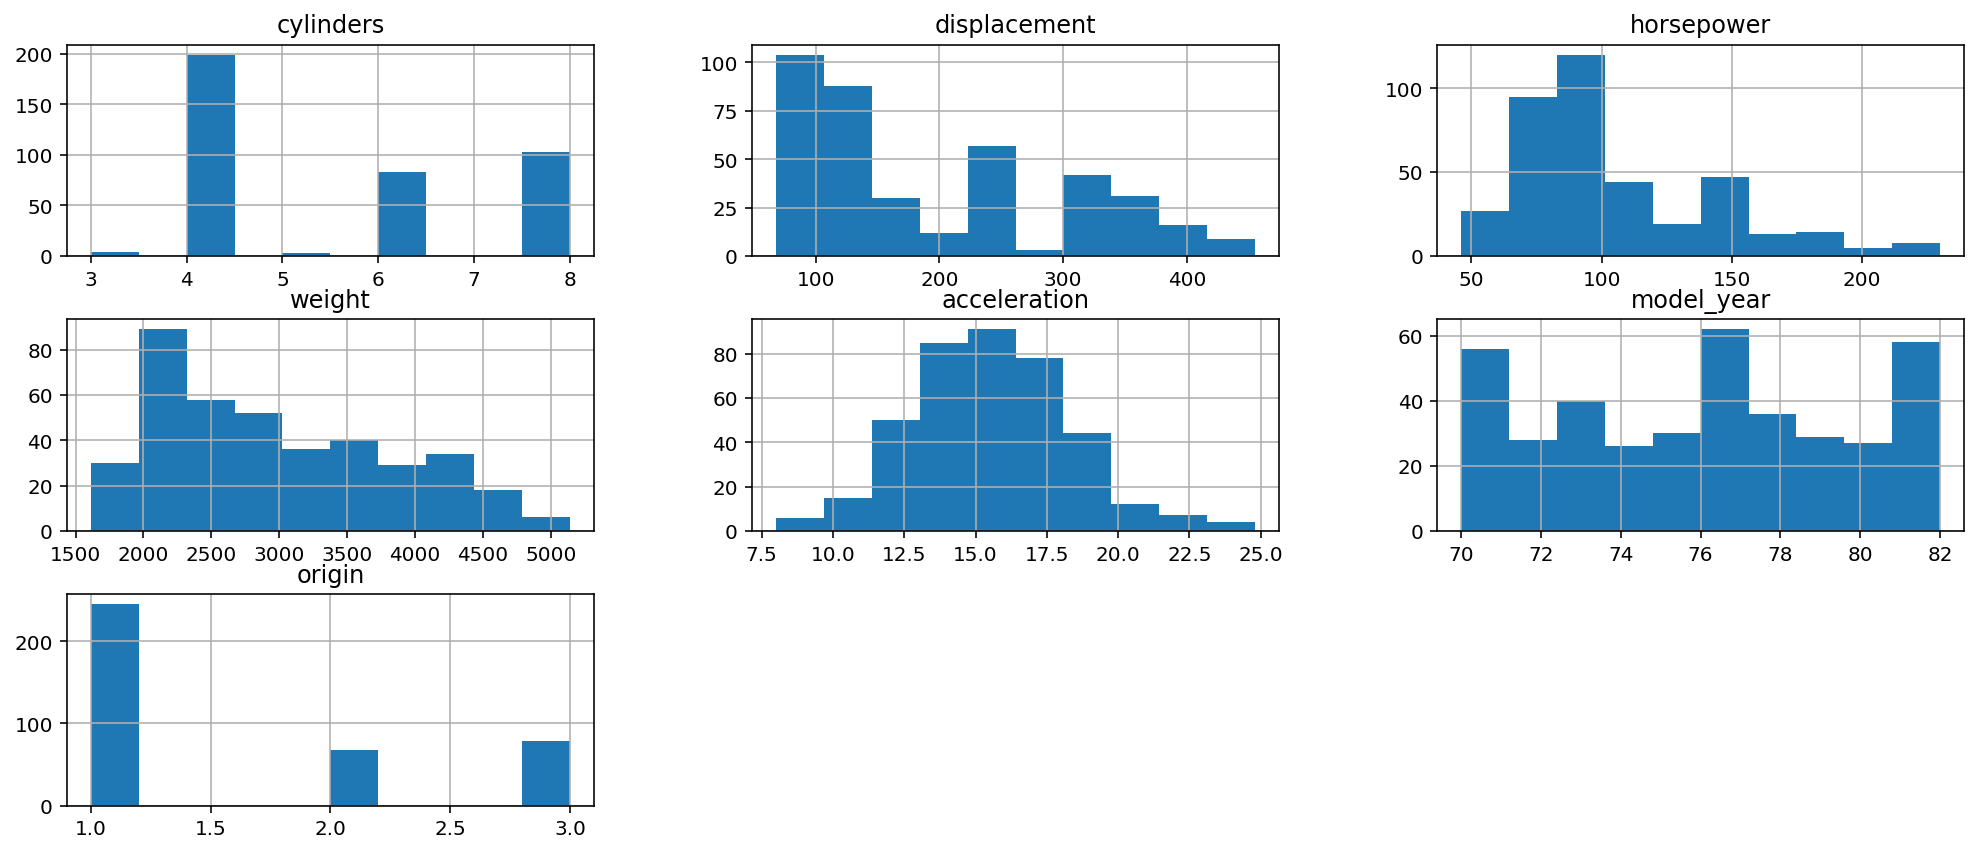

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [17, 7]

x_train_ori.hist()
plt.show()

In [ ]:
def imprimir_datos_modelo(modelo, x_ori, x, y):

  print('w_0', modelo.intercept_)

  print(modelo.coef_.tolist())

  y_pred = modelo.predict(x);


  print('R^2 (A)', modelo.score(x, y))
  print('R^2 (B)', r2_score(y, y_pred))
  i_mse_1 = mean_squared_error(y_pred, y)
  i_mse_2 = mean_squared_error(y_true = y, y_pred = y_pred)
  print('Error cuadrático medio: %.4f' %(i_mse_1))
  print('Error absoluto medio', mean_absolute_error(y_pred, y))
  print('Mediana del error absoluto', median_absolute_error(y_pred, y))
  print('Error Cuadrático Medio = ' + str(np.sqrt(i_mse_1)))
  print("\n\n")

  

def imprimir_datos_modelo_CV(modelo, x_ori, x, y):

  y_pred = modelo.predict(x);


  print('R^2 (A)', modelo.score(x, y))
  print('R^2 (B)', r2_score(y, y_pred))
  i_mse_1 = mean_squared_error(y_pred, y)
  i_mse_2 = mean_squared_error(y_true = y, y_pred = y_pred)
  print('Error cuadrático medio: %.4f' %(i_mse_1))
  print('Error absoluto medio', mean_absolute_error(y_pred, y)) 
  print('Mediana del error absoluto', median_absolute_error(y_pred, y))
  print('Error Cuadrático Medio = ' + str(np.sqrt(i_mse_1)))
  print("\n\n")


In [ ]:
model_rl = LinearRegression() 
model_rl.fit(x_train, y_train)  #x_train tiene mas de 1 variable y por eso es de multiple variables

imprimir_datos_modelo(model_rl, x_train_ori, x_train, y_train)

w_0 -17.218434622017536
[-0.4933763188584681, 0.019895643742017112, -0.016951144227501214, -0.006474043397440444, 0.0805758383248626, 0.7507726779503117, 1.42614049542315]
R^2 (A) 0.8214780764810599
R^2 (B) 0.8214780764810599
Error cuadrático medio: 10.8475
Error absoluto medio 2.499309832500872
Mediana del error absoluto 2.0220944142858706
Error Cuadrático Medio = 3.2935514183022025





In [ ]:
x_ejem_1 = np.array([[4, 119, 80, 3000, 17, 73, 2]] )
print('Estimacion (1):', model_rl.predict( x_ejem_1 ))

x_ejem_2 = np.array([[6, 116, 83, 2700, 21, 70, 3]] )
print('Estimacion (2):', model_rl.predict( x_ejem_2 ))
x_ejem = np.concatenate( (x_ejem_1, x_ejem_2 ) )

Estimacion (1): [21.42589571]
Estimacion (2): [21.76694154]


In [ ]:
x_train_ori.describe()

x_train_di_ho = x_train_ori[['displacement','horsepower']]

model_rl_di_ho = LinearRegression()
model_rl_di_ho.fit(x_train_di_ho, y_train)

imprimir_datos_modelo(model_rl_di_ho, x_train_di_ho, x_train_di_ho, y_train)

w_0 37.469487668030396
[-0.04081837430358191, -0.05827532890650249]
R^2 (A) 0.6643293016845742
R^2 (B) 0.6643293016845742
Error cuadrático medio: 20.3963
Error absoluto medio 3.4703421871100373
Mediana del error absoluto 2.998689103815556
Error Cuadrático Medio = 4.516223072932701





Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

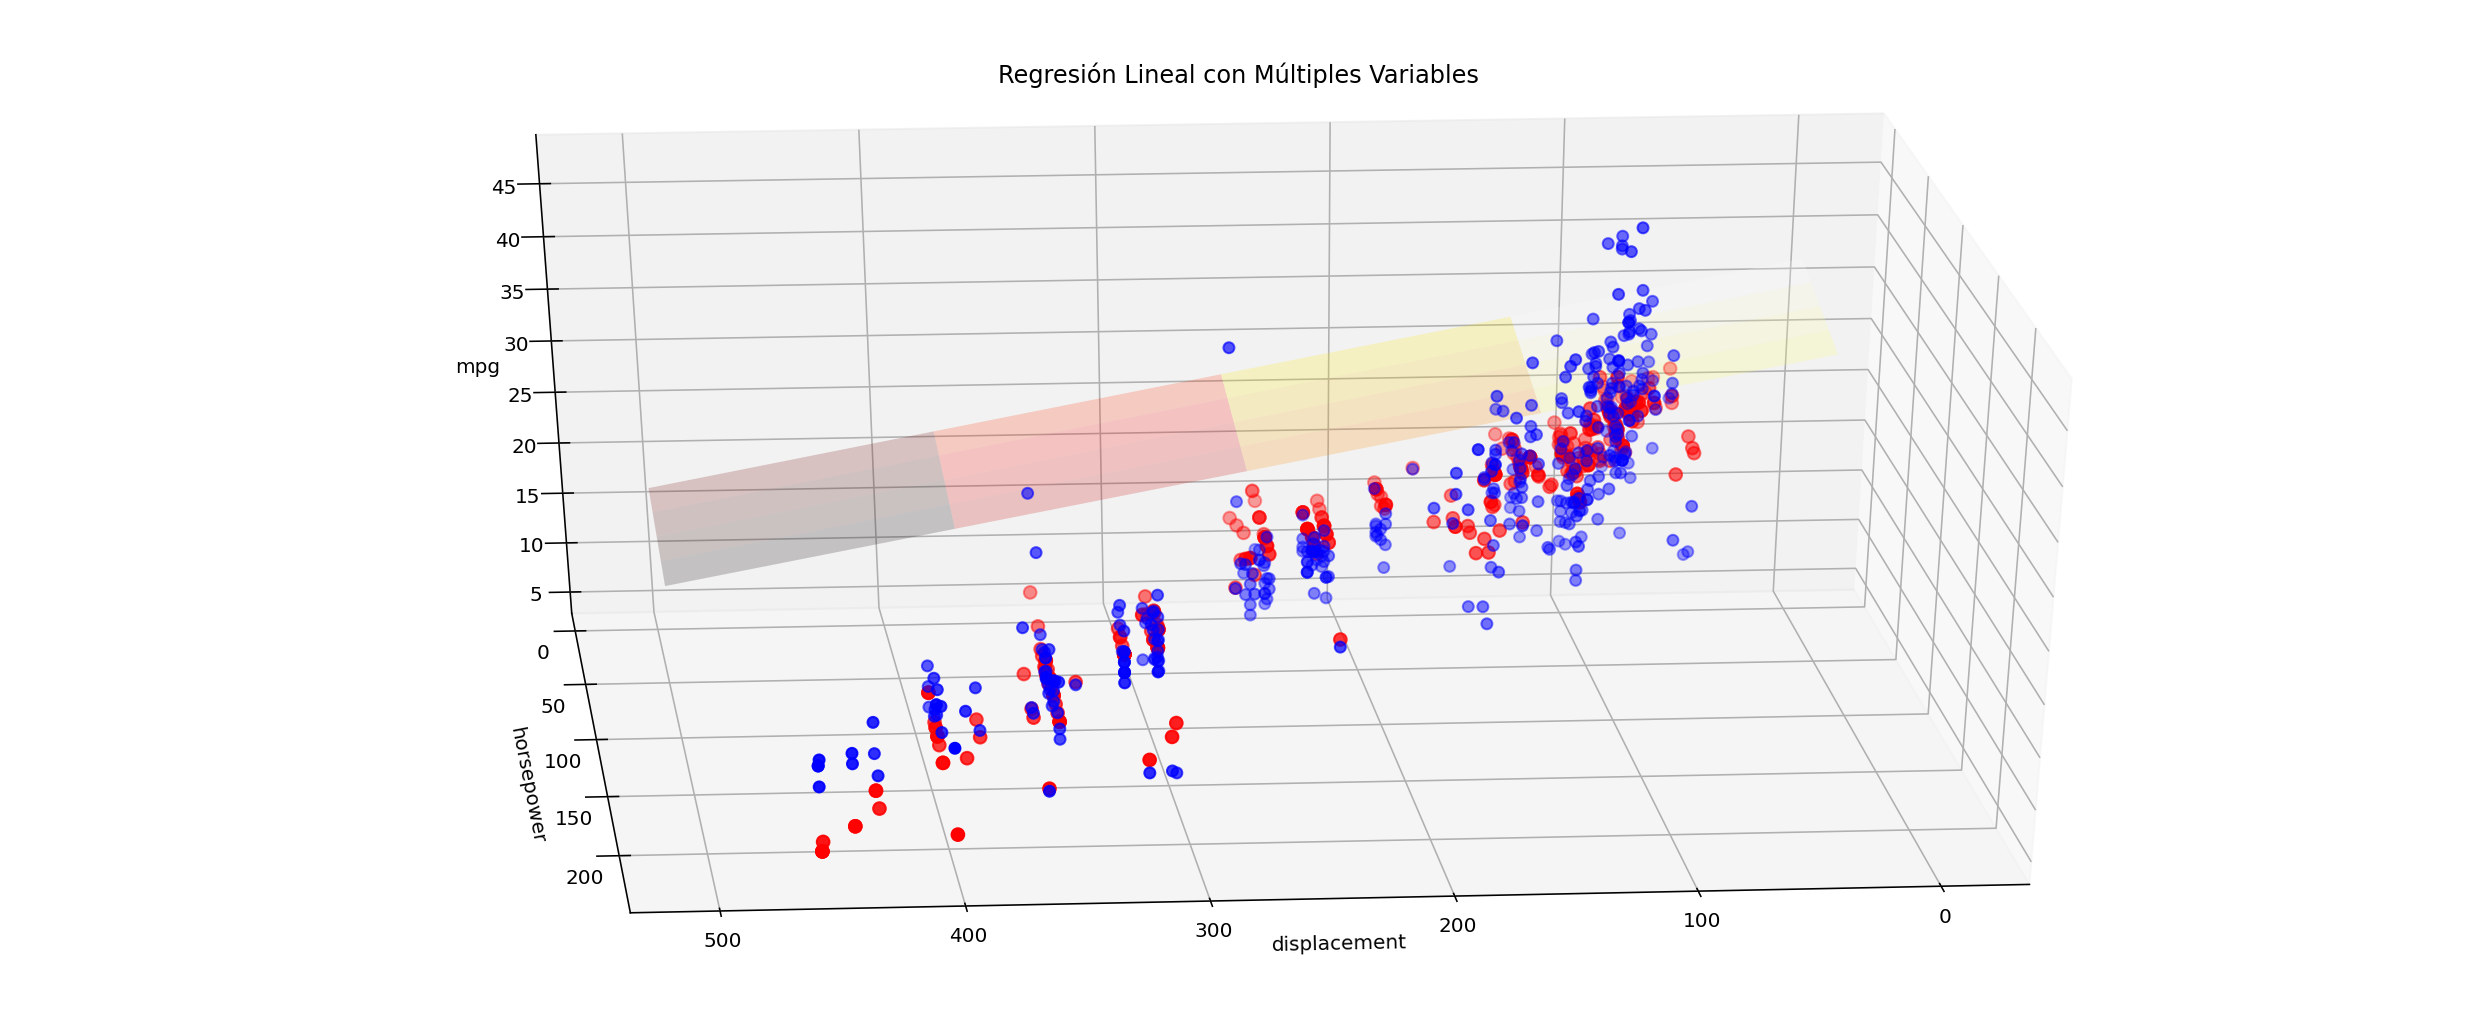

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = Axes3D(fig)

xx, yy = np.meshgrid(np.linspace(0, 500, num=5), np.linspace(0, 60, num=5))


nuevoX = (model_rl_di_ho.coef_[0] * xx)
nuevoY = (model_rl_di_ho.coef_[1] * yy) 

z = (nuevoX + nuevoY + model_rl_di_ho.intercept_)

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

ax.scatter(x_train_di_ho['displacement'], x_train_di_ho['horsepower'], y_train, c='blue',s=30)

ax.scatter(x_train_di_ho['displacement'], x_train_di_ho['horsepower'], model_rl_di_ho.predict(x_train_di_ho), c='red',s=40)

ax.view_init(elev=30., azim=85)
        
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('mpg')
ax.set_title('Regresión Lineal con Múltiples Variables')



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_X = df_auto[['cylinders', 'displacement', 'horsepower',	'weight', 'acceleration', 'model_year', 'origin']] 
  
vif_data = pd.DataFrame() 
vif_data["feature"] = vif_X.columns 
  
vif_data["VIF"] = [variance_inflation_factor(vif_X.values, i) 
                          for i in range(len(vif_X.columns))] 

vif_data_sorted = vif_data.sort_values(by=['VIF'], ascending=False)

print(vif_data_sorted)

        feature         VIF
3        weight  139.454162
0     cylinders  117.708547
5    model_year  115.794614
1  displacement   96.909762
4  acceleration   69.699769
2    horsepower   67.072154
6        origin    8.469942


In [ ]:
x_train_ori.describe()

x_train_we_cy_my = x_train_ori[['weight','cylinders', 'model_year']]
#x_train_we_cy_my.describe()
model_rl_we_cy_my = LinearRegression()
model_rl_we_cy_my.fit(x_train_we_cy_my, y_train)

imprimir_datos_modelo(model_rl_we_cy_my, x_train_we_cy_my, x_train_we_cy_my, y_train)

w_0 -13.907605934976797
[-0.006365697499915227, -0.151729012593808, 0.7520200488347157]
R^2 (A) 0.8083884634554312
R^2 (B) 0.8083884634554312
Error cuadrático medio: 11.6428
Error absoluto medio 2.6050494318490864
Mediana del error absoluto 2.2031782291222193
Error Cuadrático Medio = 3.4121608516580593





In [ ]:
plt.rcParams['figure.figsize'] = [17, 7]
df_auto.corr(method="pearson")

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.423329
model_year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.580541
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.565209
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,1.000000


In [ ]:
val_corr_pearson = df_auto.corr(method="pearson")

#plt.matshow(val_corr_pearson)
val_corr_pearson.style.background_gradient(cmap='coolwarm').set_precision(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.0000,0.9508,0.8430,0.8975,-0.5047,-0.3456,-0.5689,-0.7776
displacement,0.9508,1.0000,0.8973,0.9330,-0.5438,-0.3699,-0.6145,-0.8051
horsepower,0.8430,0.8973,1.0000,0.8645,-0.6892,-0.4164,-0.4552,-0.7784
weight,0.8975,0.9330,0.8645,1.0000,-0.4168,-0.3091,-0.5850,-0.8322
acceleration,-0.5047,-0.5438,-0.6892,-0.4168,1.0000,0.2903,0.2127,0.4233
model_year,-0.3456,-0.3699,-0.4164,-0.3091,0.2903,1.0000,0.1815,0.5805
origin,-0.5689,-0.6145,-0.4552,-0.5850,0.2127,0.1815,1.0000,0.5652
mpg,-0.7776,-0.8051,-0.7784,-0.8322,0.4233,0.5805,0.5652,1.0000


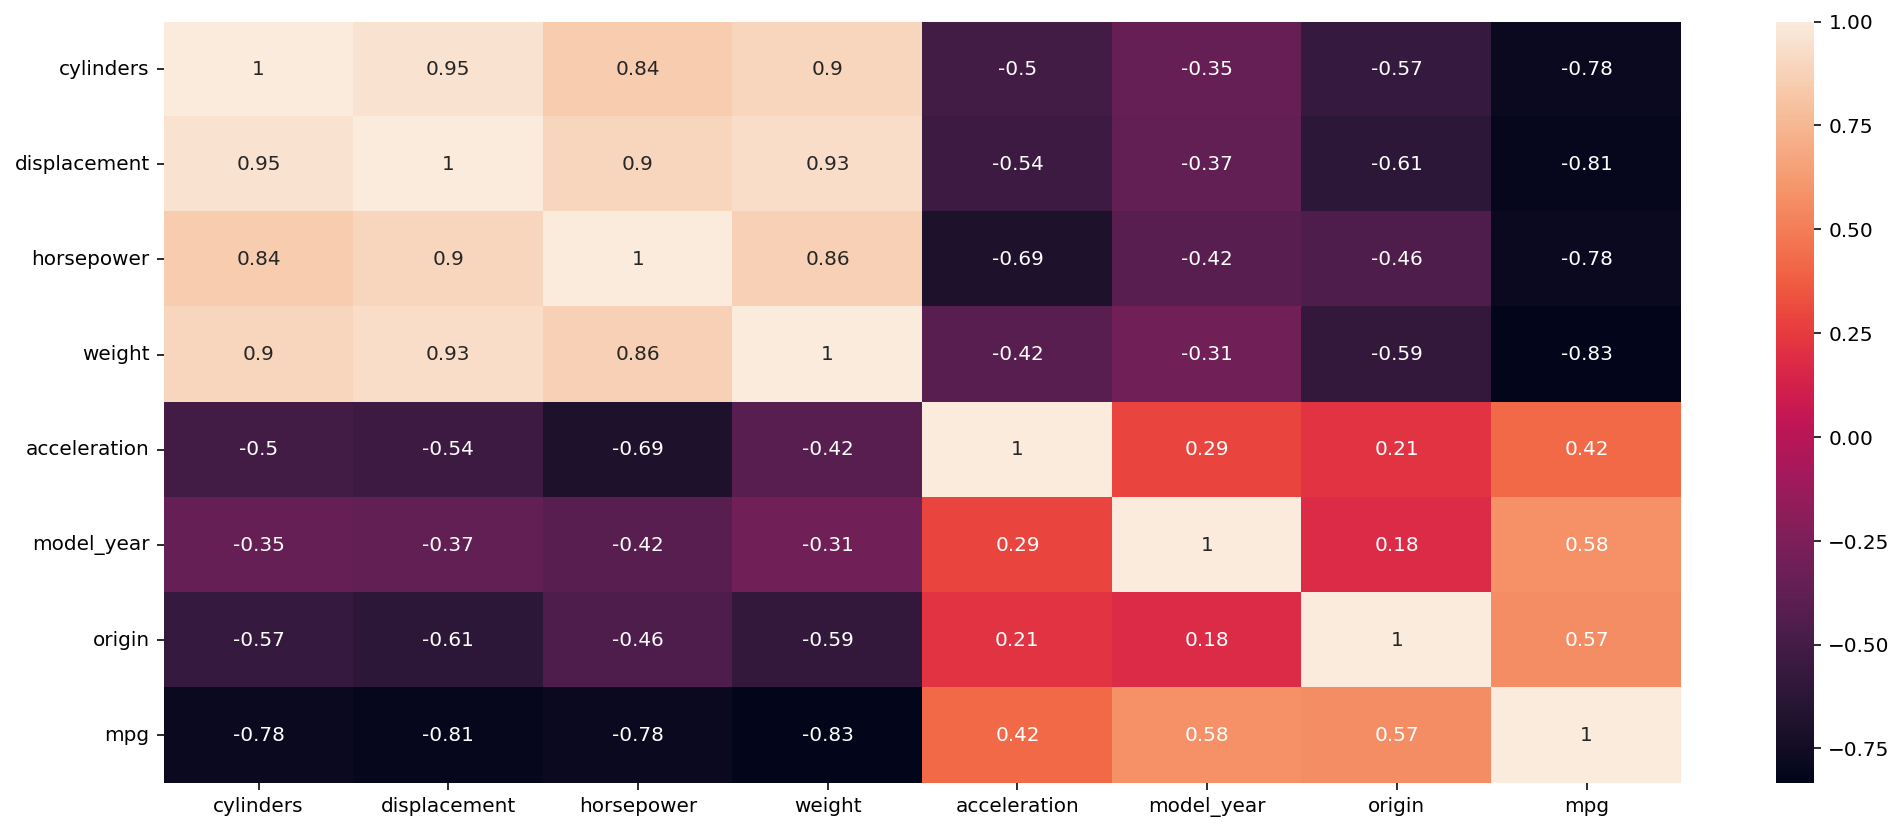

In [ ]:
import seaborn as sns

sns.heatmap(val_corr_pearson,  annot = True)

Text(0.5, 0, 'origin')

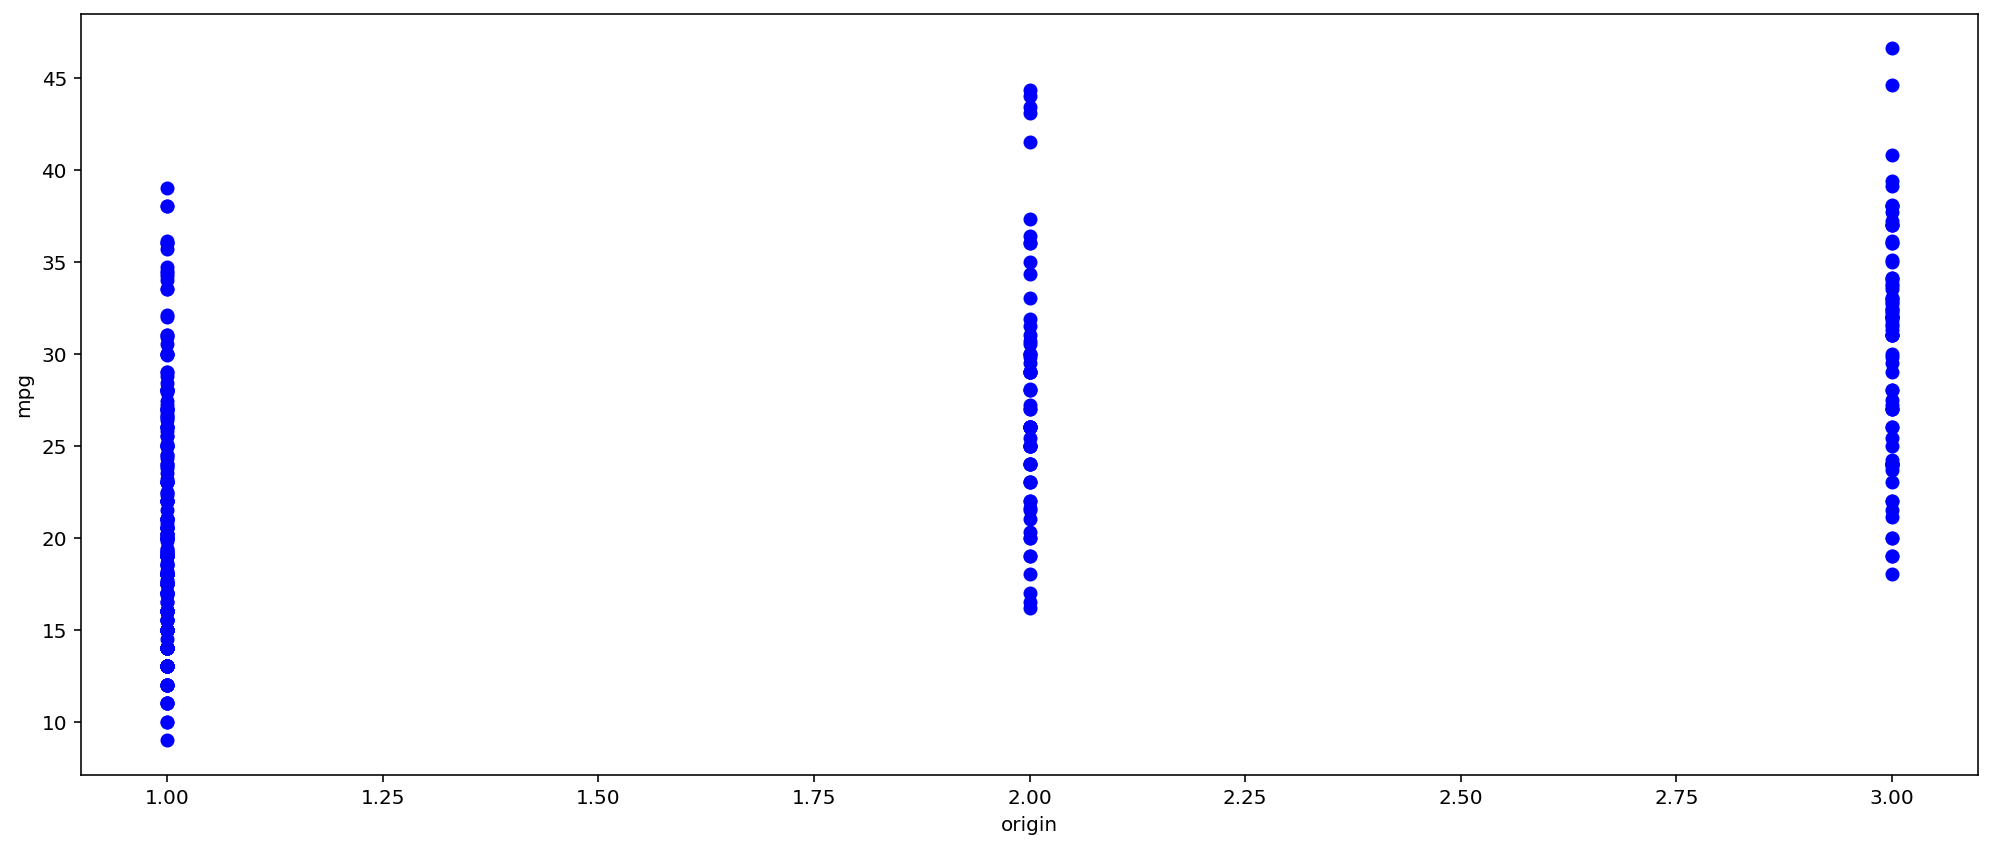

In [ ]:
plt.plot(df_auto['origin'], df_auto['mpg'], "bo")
plt.ylabel('mpg')
plt.xlabel('origin')

Text(0.5, 0, 'model_year')

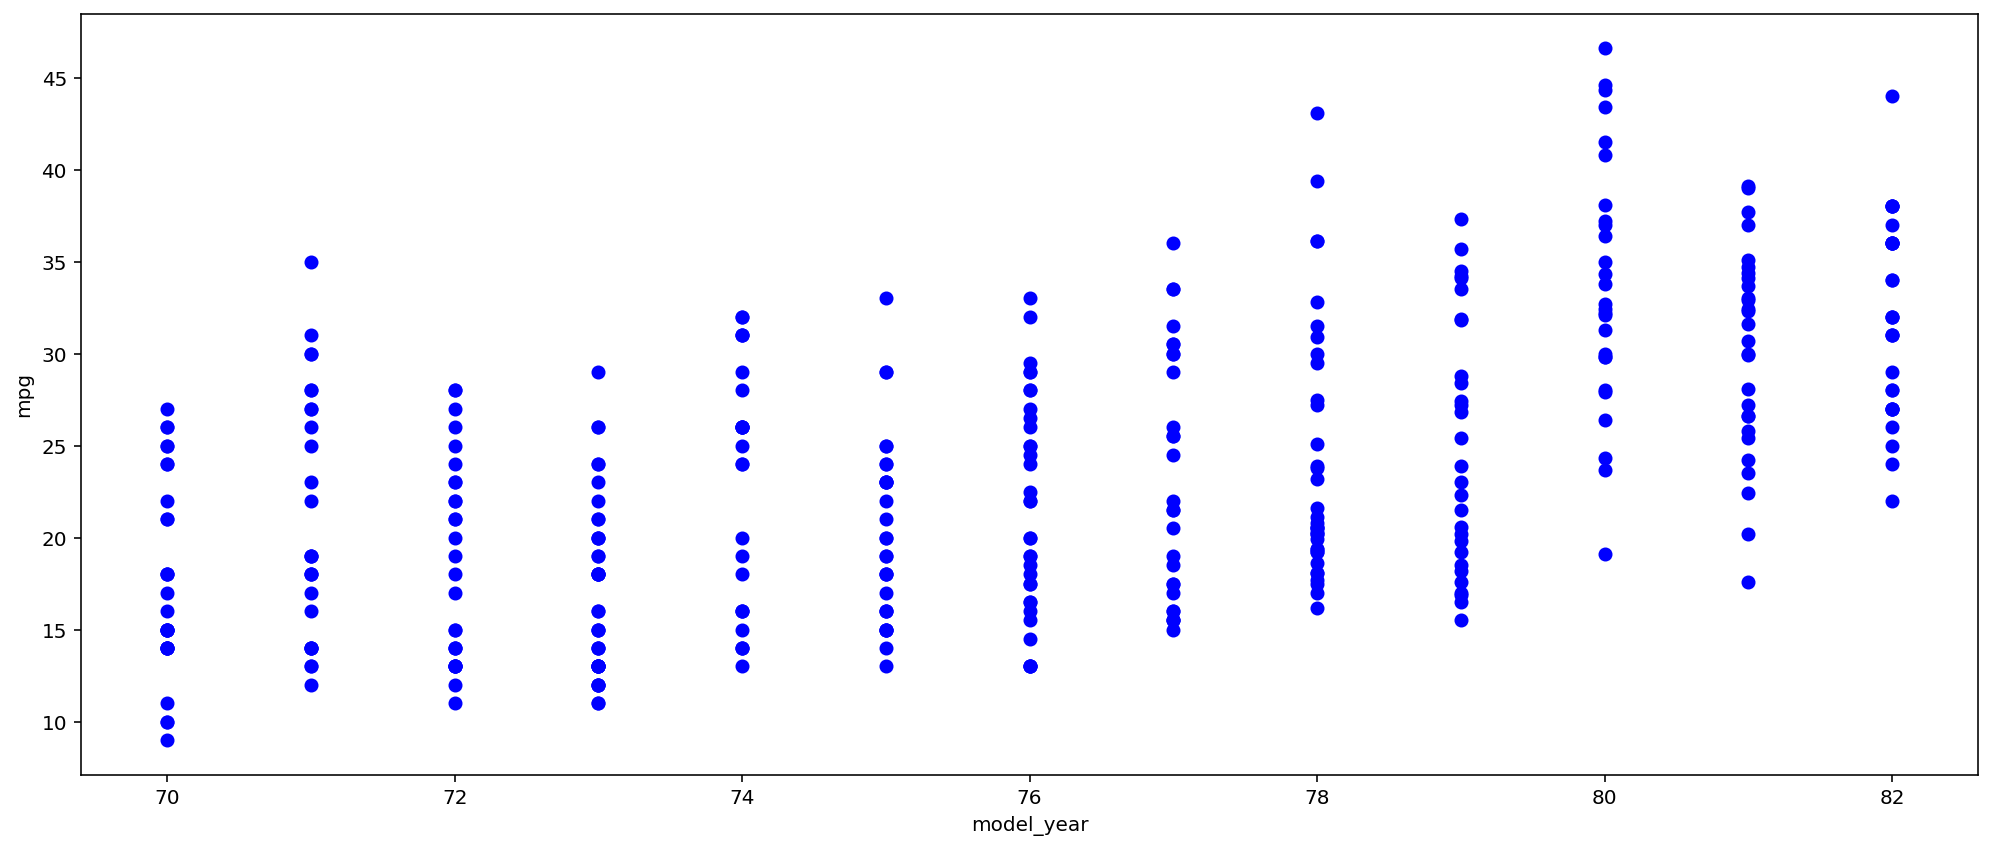

In [ ]:
plt.plot(df_auto['model_year'], df_auto['mpg'], "bo")
plt.ylabel('mpg')
plt.xlabel('model_year')

Text(0.5, 0, 'acceleration')

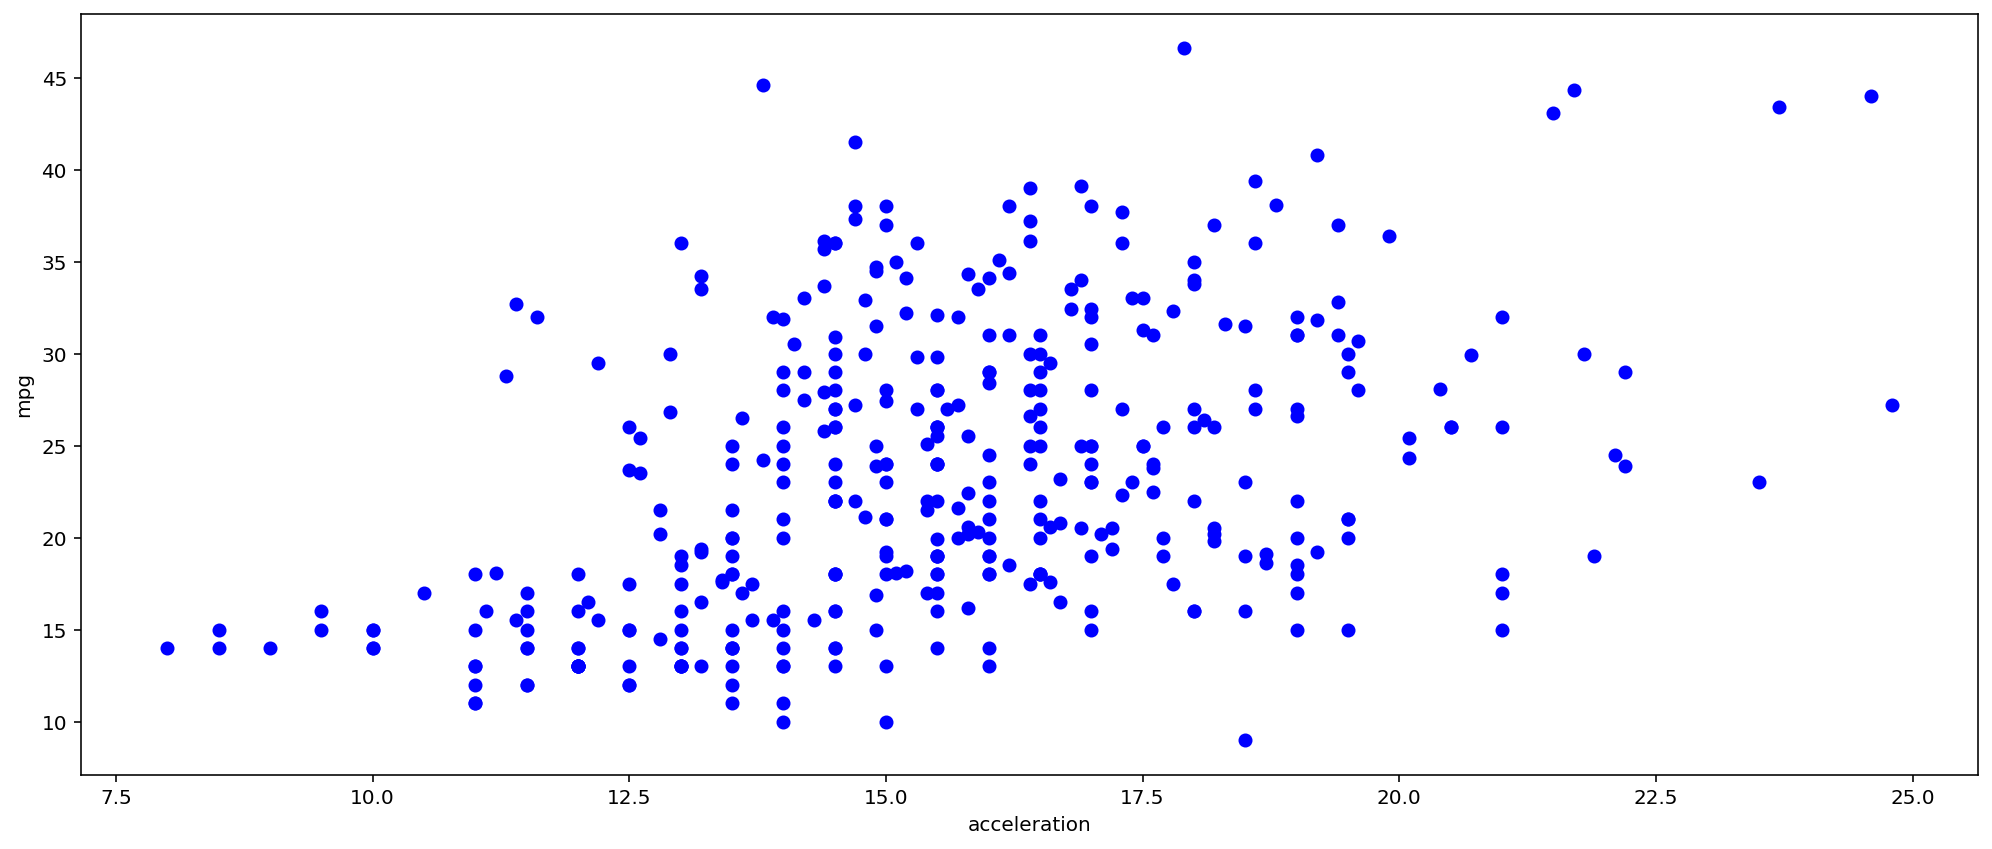

In [ ]:
plt.plot(df_auto['acceleration'], df_auto['mpg'], "bo")
plt.ylabel('mpg')
plt.xlabel('acceleration')

Text(0.5, 0, 'weight')

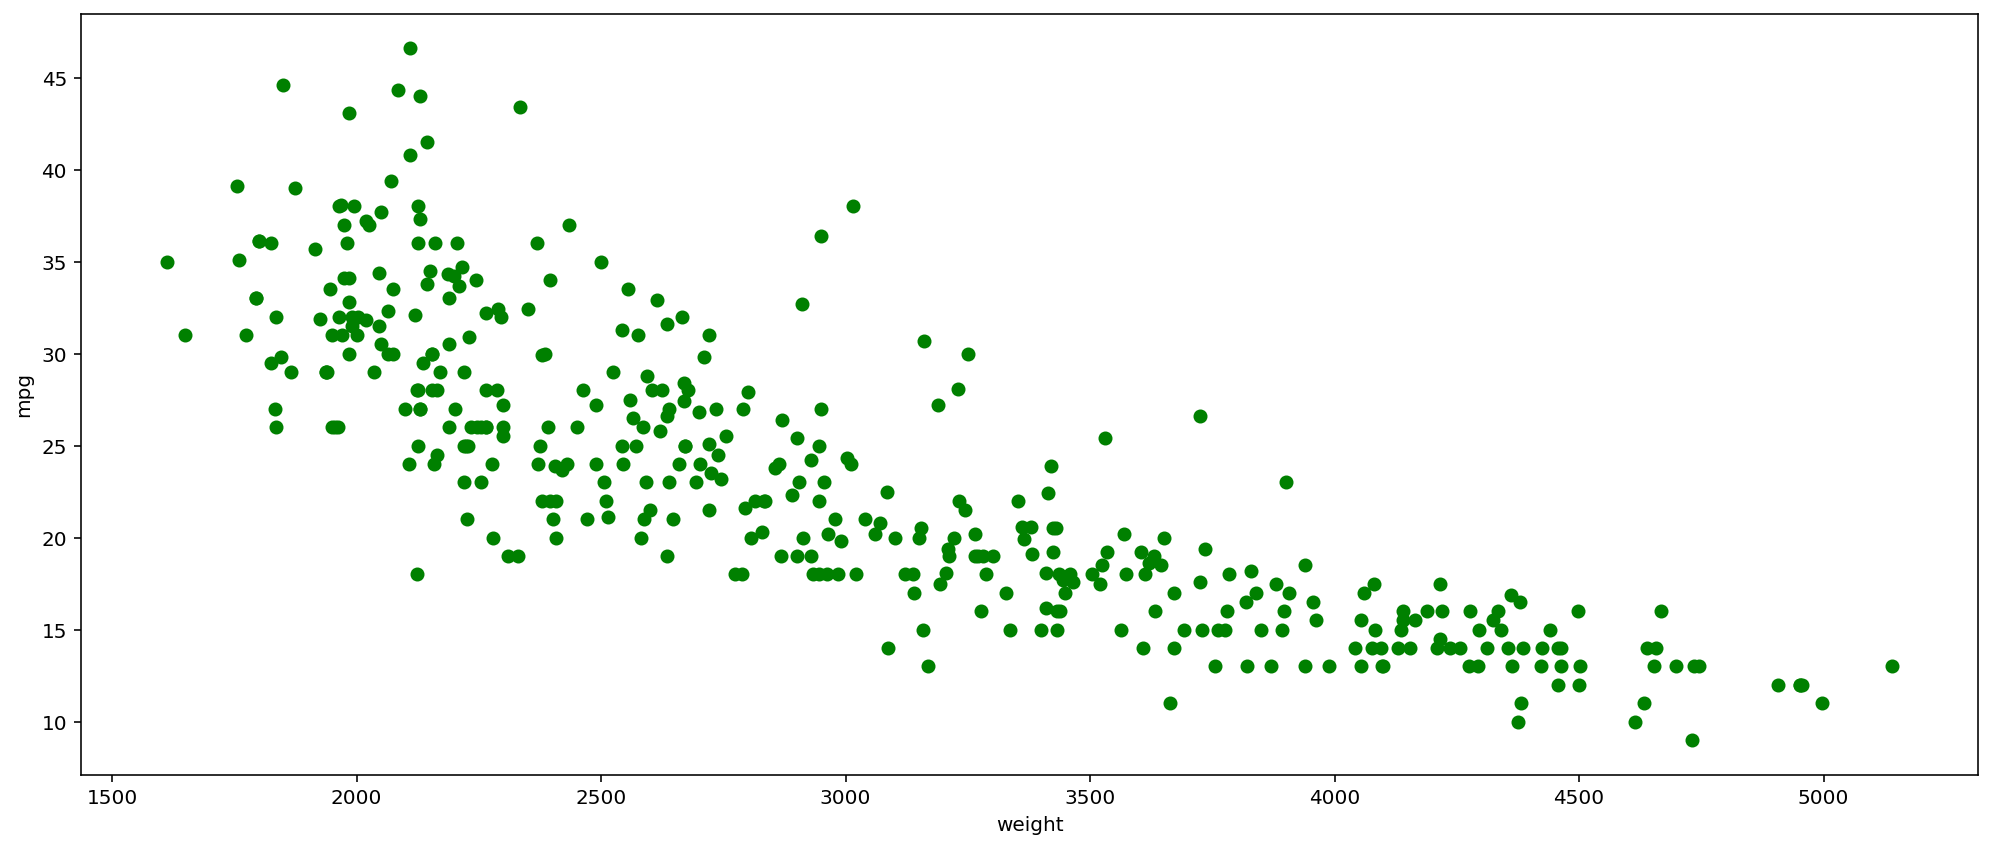

In [ ]:
plt.plot(df_auto['weight'], df_auto['mpg'], "bo", color='green')
plt.ylabel('mpg')
plt.xlabel('weight')


Text(0.5, 0, 'horsepower')

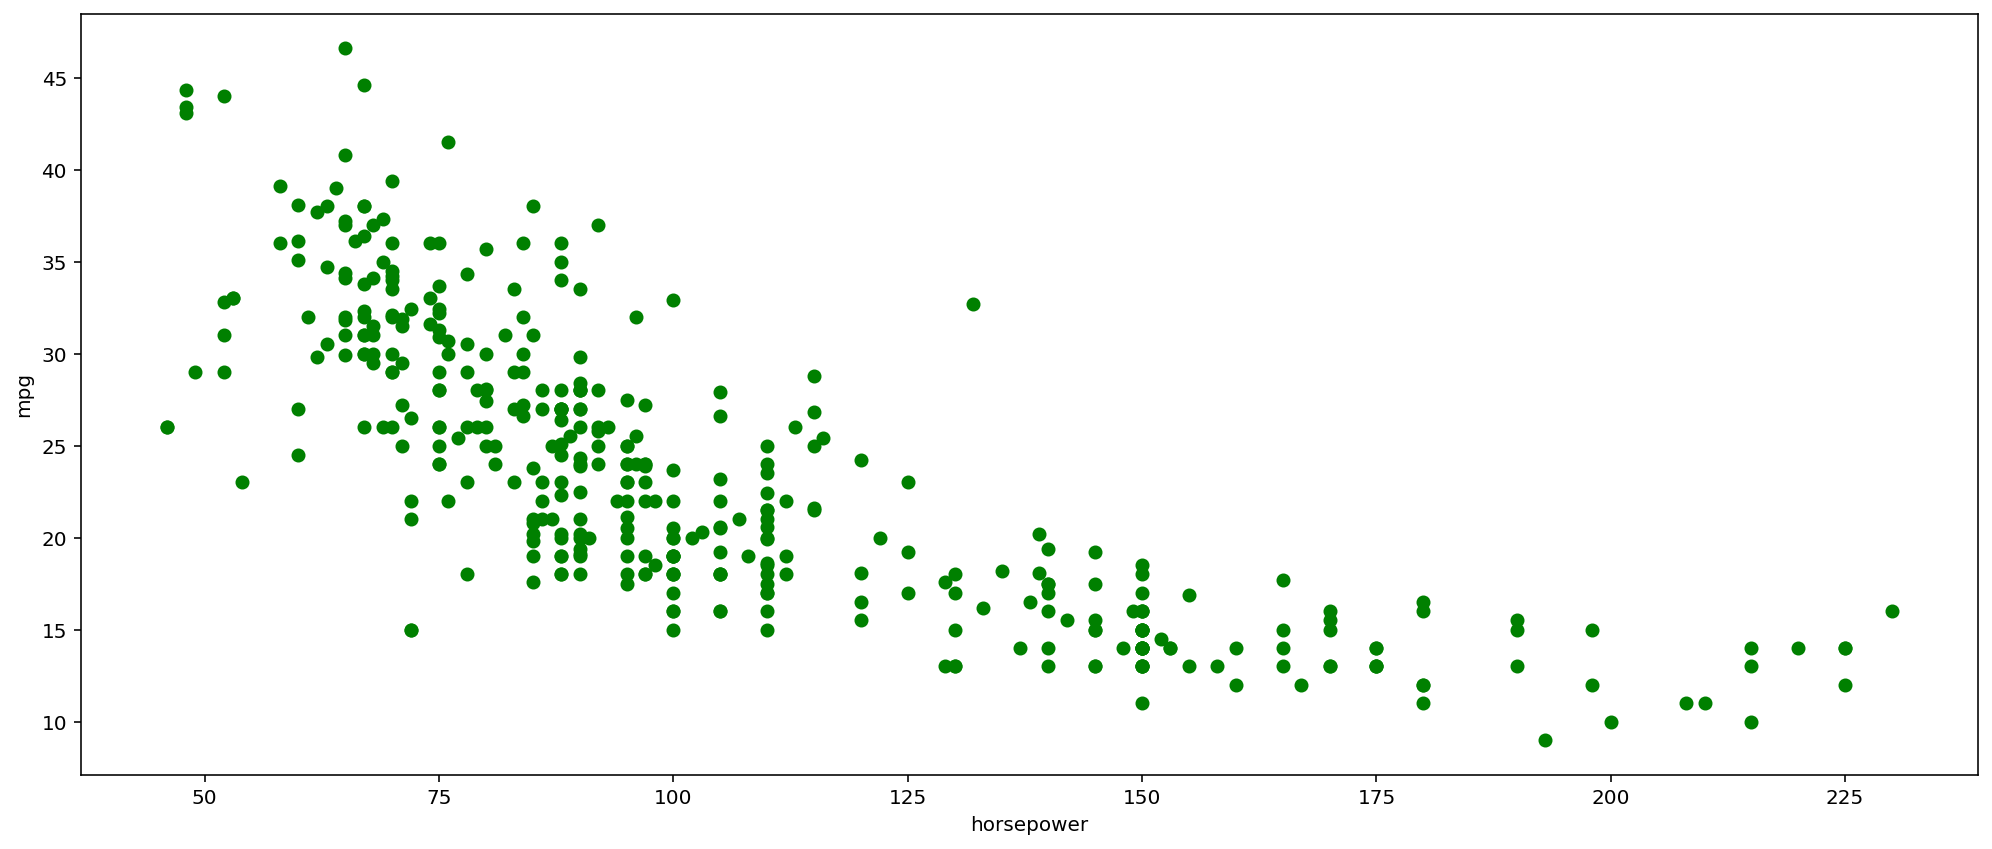

In [ ]:
plt.plot(df_auto['horsepower'], df_auto['mpg'], "bo", color='green')
plt.ylabel('mpg')
plt.xlabel('horsepower')

Text(0.5, 0, 'displacement')

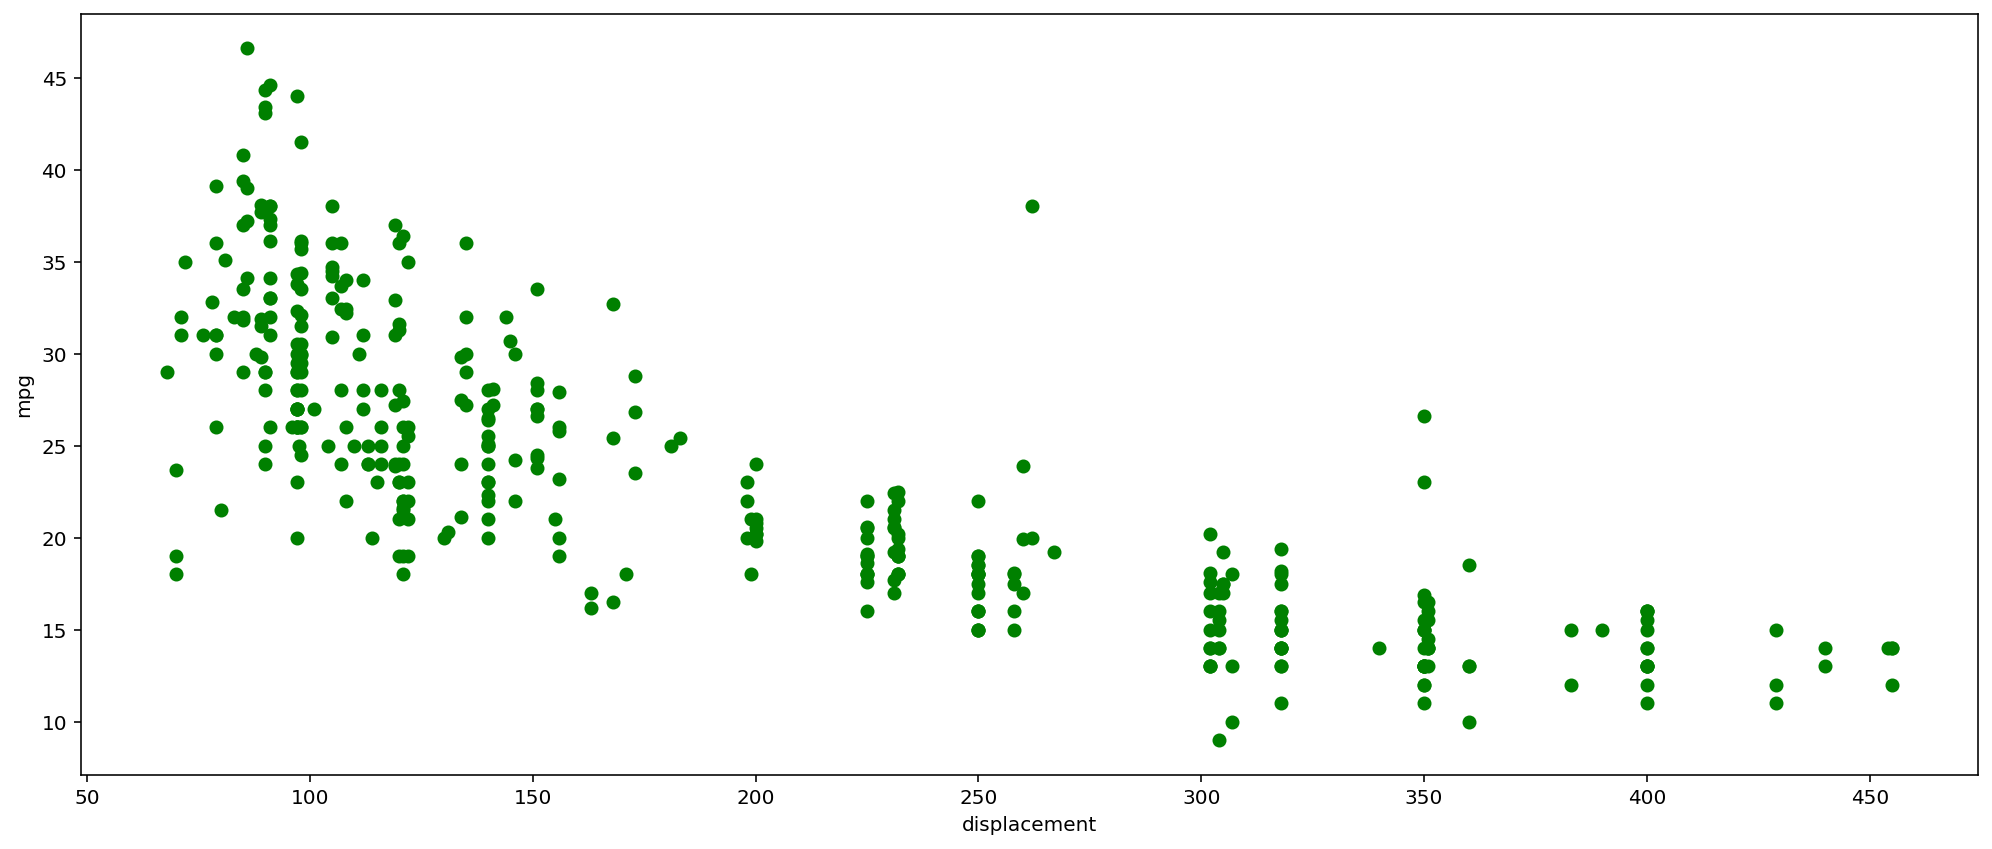

In [ ]:
plt.plot(df_auto['displacement'], df_auto['mpg'], "bo", color='green')
plt.ylabel('mpg')
plt.xlabel('displacement')

Text(0.5, 0, 'cylinders')

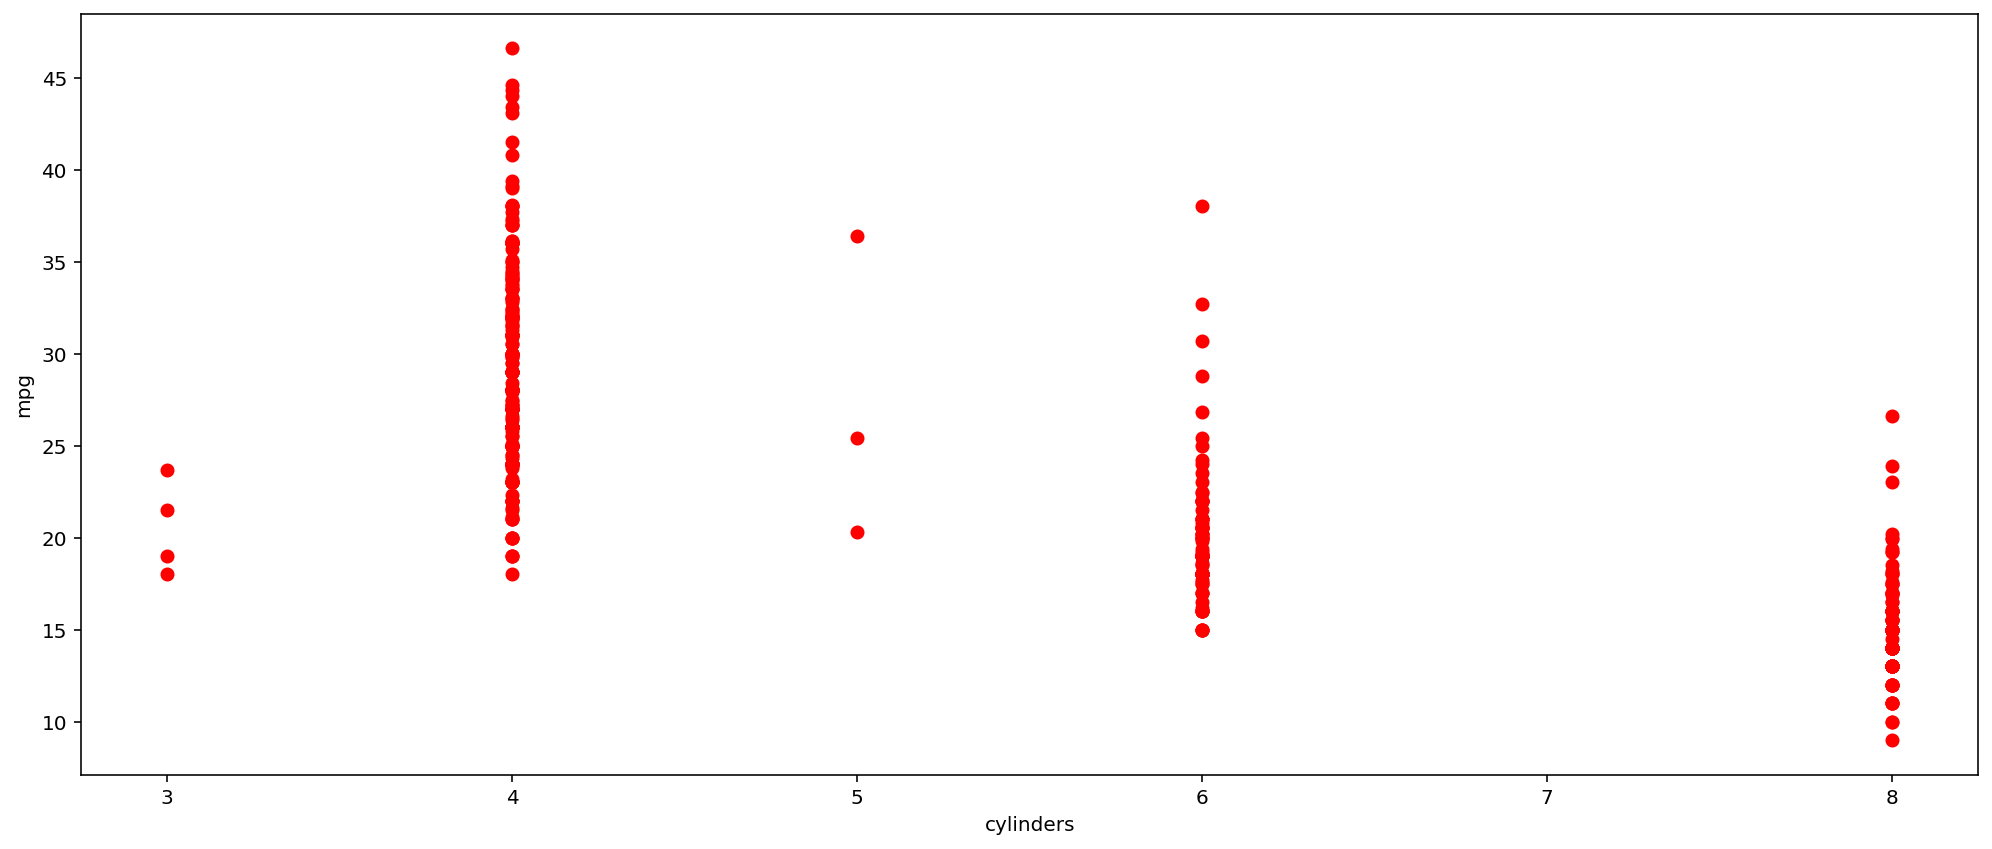

In [ ]:
plt.plot(df_auto['cylinders'], df_auto['mpg'], "bo", color='red')
plt.ylabel('mpg')
plt.xlabel('cylinders')

## Problema 2

En el archivo "crime_data.csv" se muestra el número de crímenes por cada 100 000 habitantes en cada uno de los estados de Estados Unidos, así como el porcentaje de la población urbana. Los crímenes se han agrupado en asalto, asesinato y violación

### Se pide:

Segmentar el conjunto de datos utilizando k-means para obtener los centroides de cada clúster y el listado de los estados en cada uno de los clústeres. Para ello, se ha de encontrar el número óptimo de clúster en el que se divide el conjunto de datos.

### Desarrollo Problema 2:

**Importamos las librerias para poder ejecutar el algortimo y poder graficar** 

In [ ]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Lectura del archivo csv_crime_data.csv**

In [ ]:
fileDownloaded = drive.CreateFile({'id':'1HxdCEfpXL65qCRh0pMlryHnZOKPkTtHt'})
fileDownloaded.GetContentFile('csv_crime_data.csv')

In [ ]:
import pandas as pd
dataframe= pd.read_csv('csv_crime_data.csv', delimiter=',' )

#df_auto.head()
dataframe.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

import multiprocessing

In [ ]:
datos = df_auto

datos.head(50)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


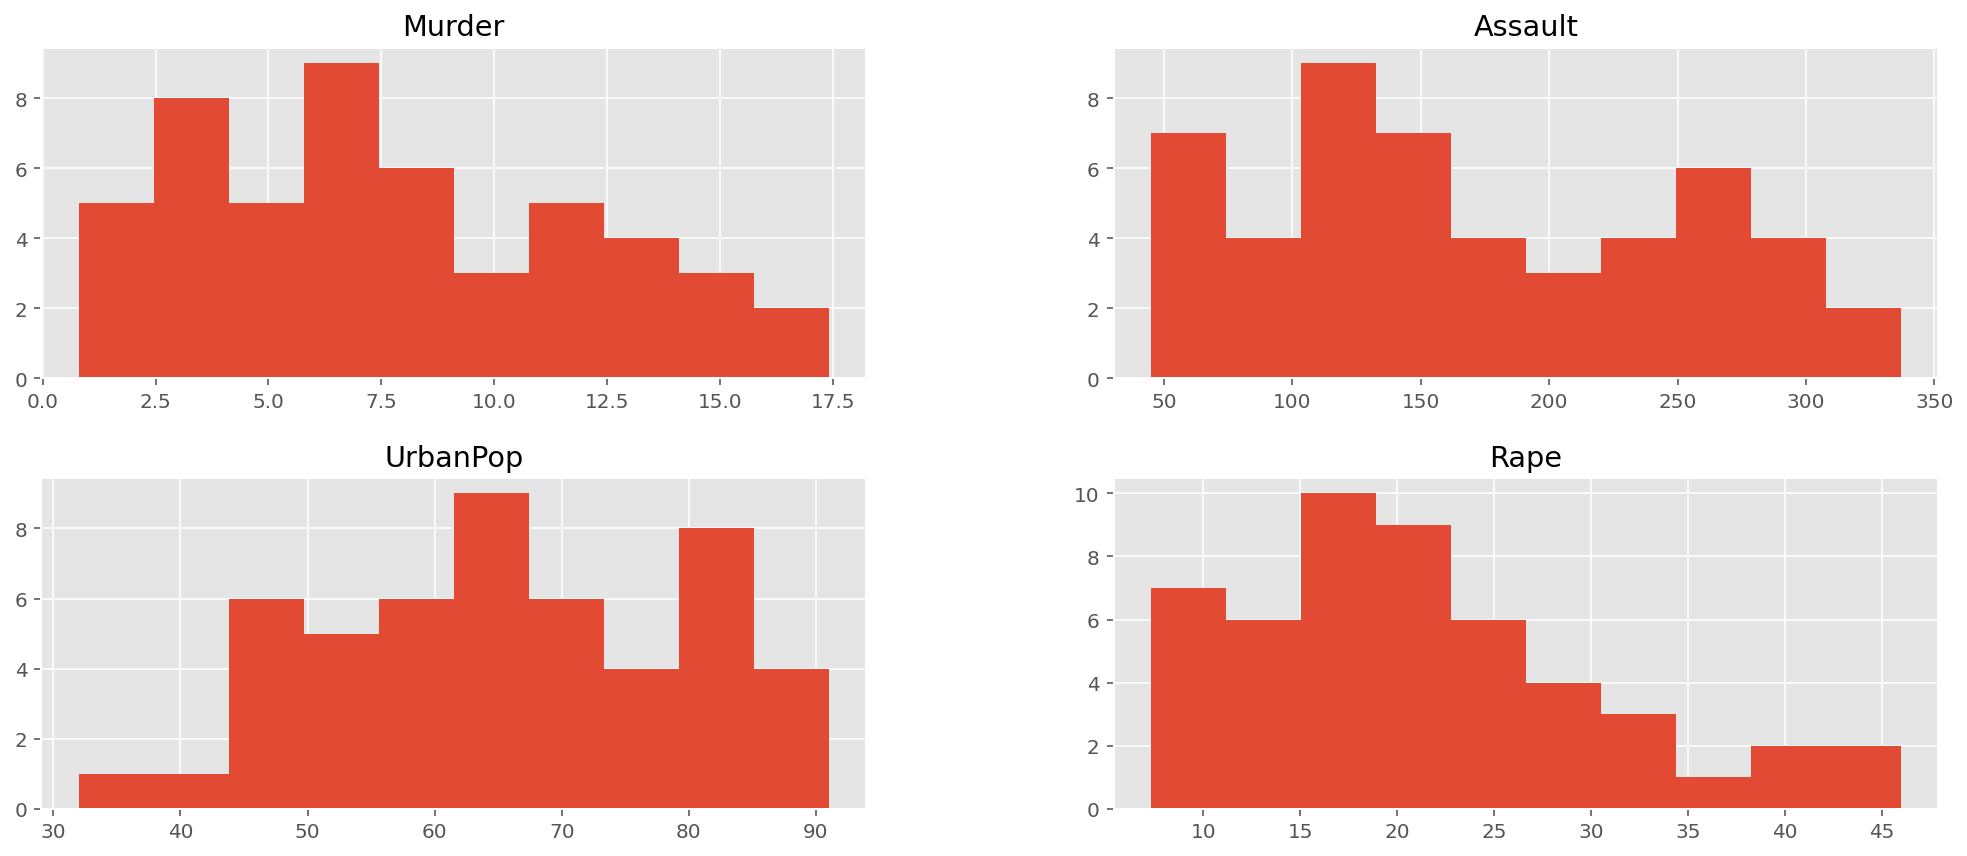

In [ ]:
dataframe.drop(['State'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


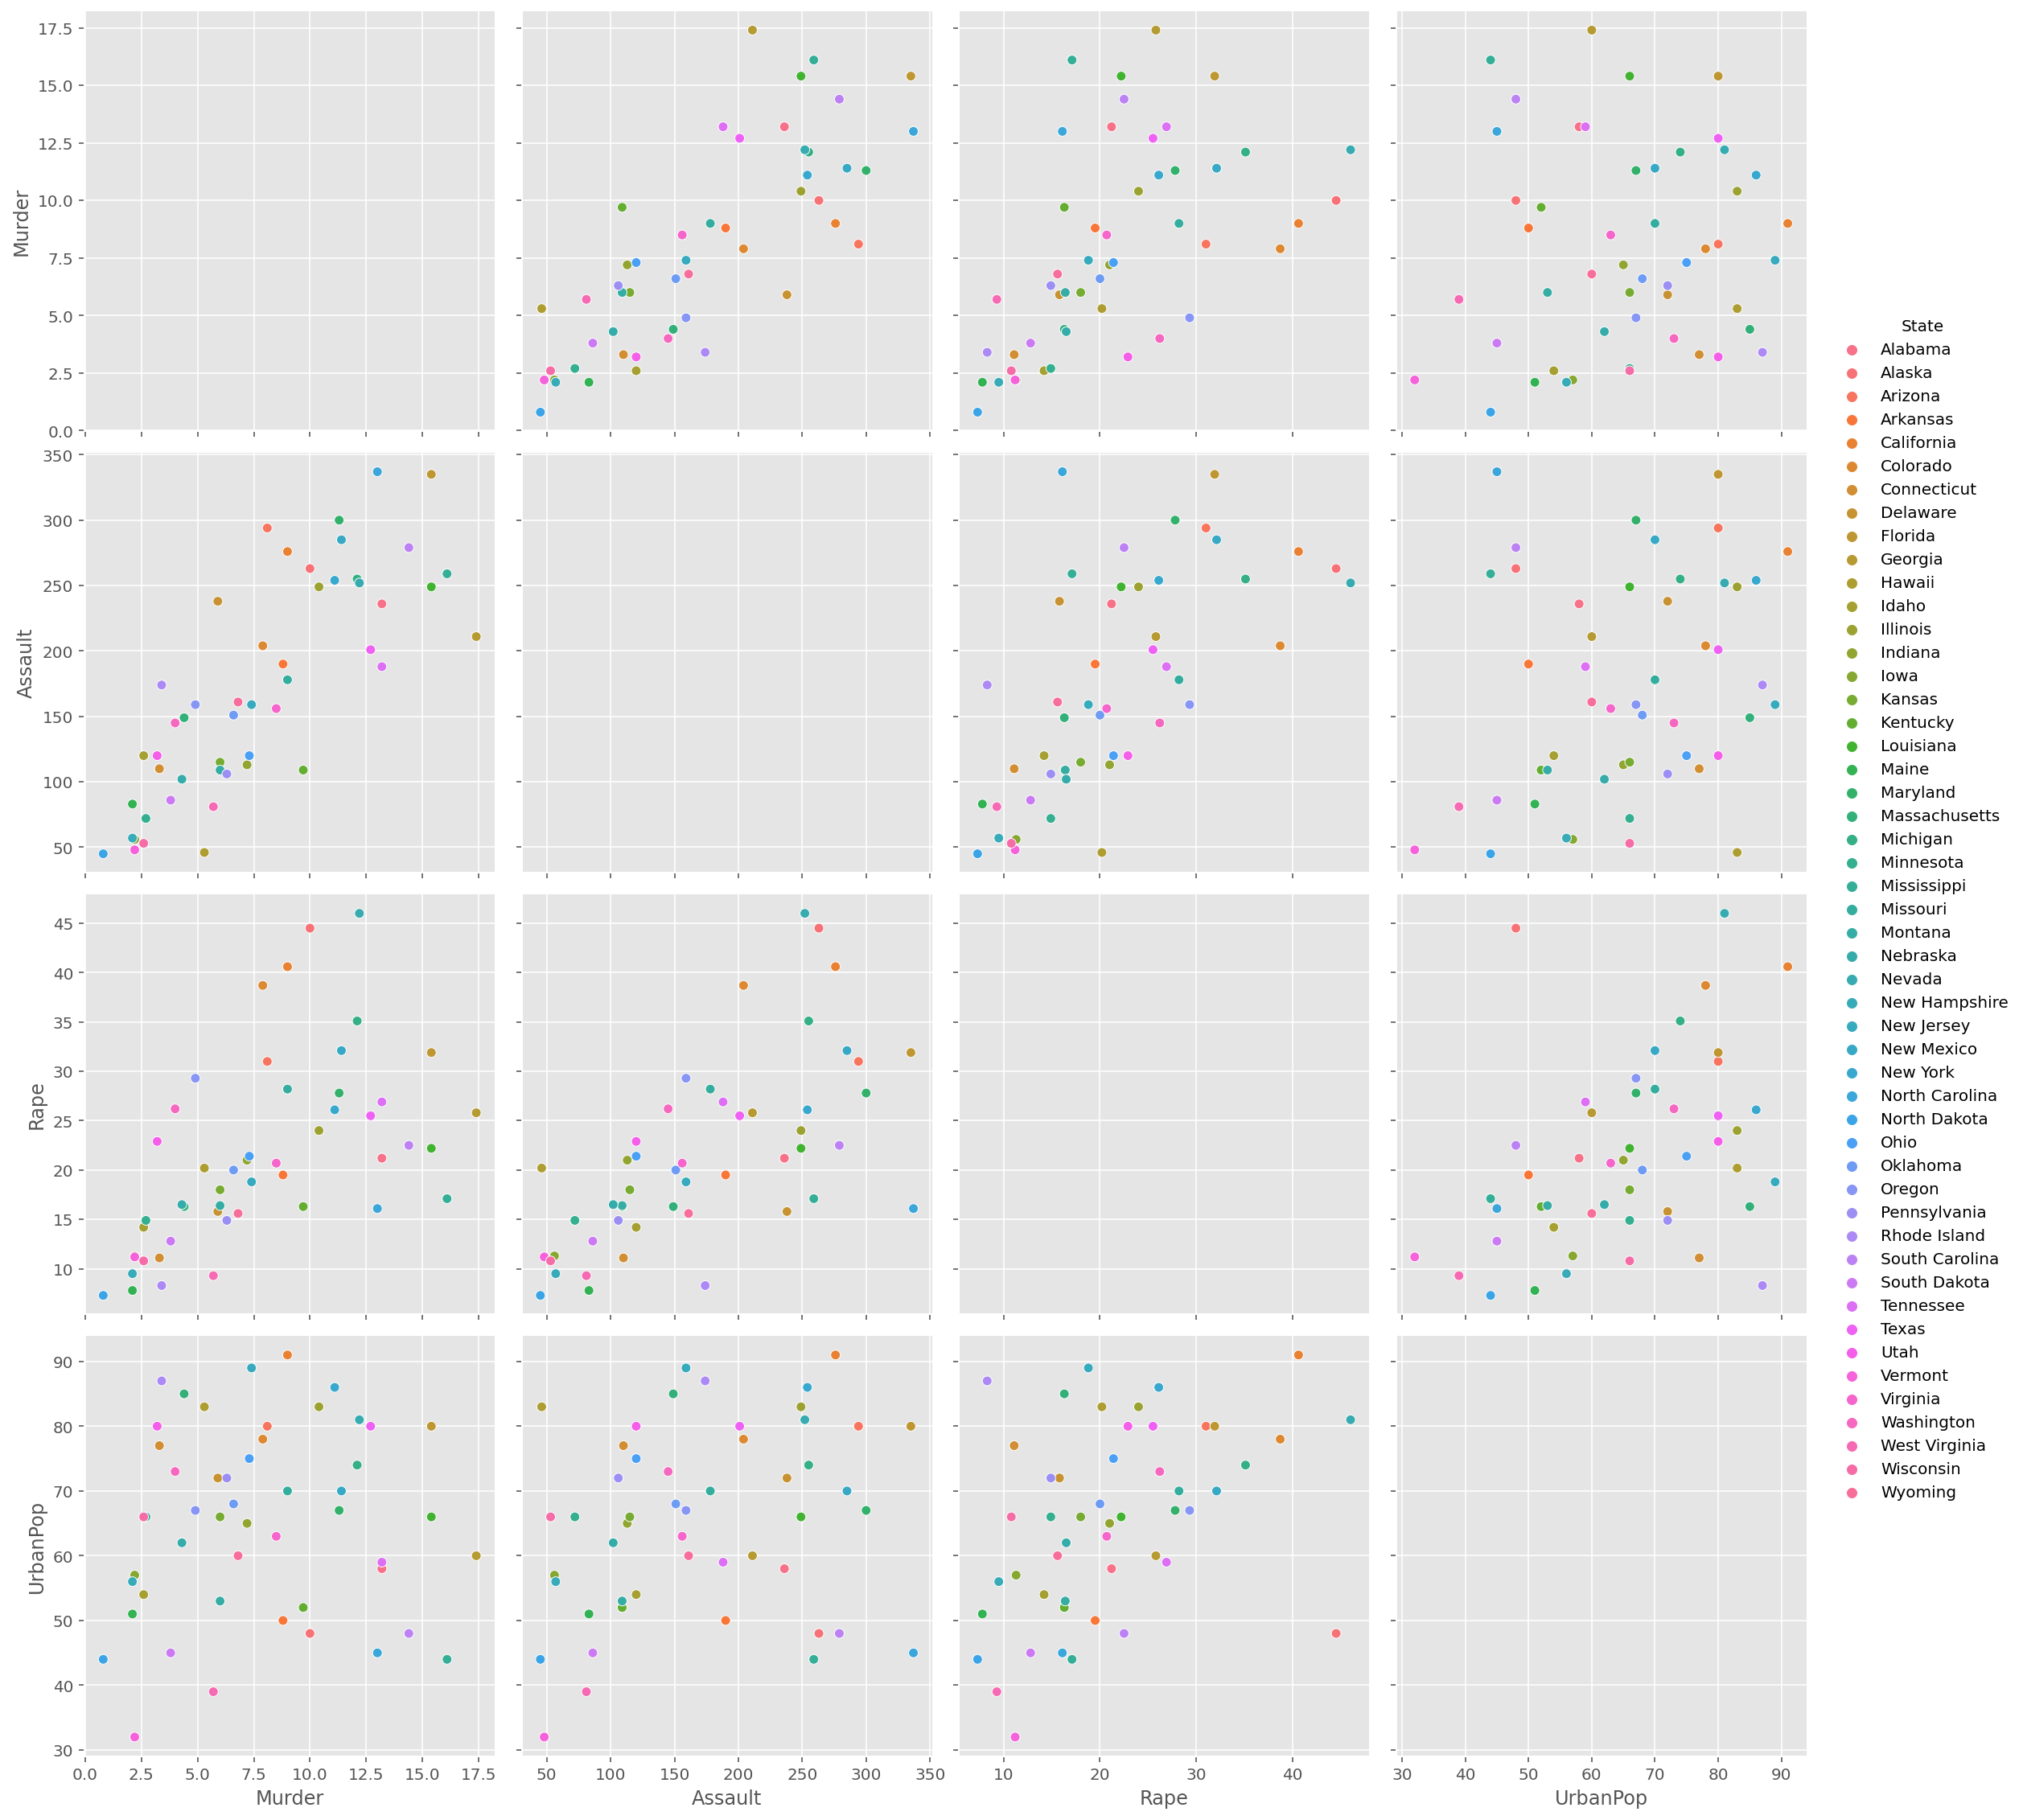

In [ ]:
sb.pairplot(dataframe.dropna(), hue='State',size=4,vars=["Murder","Assault","Rape","UrbanPop"],kind='scatter')

In [ ]:
X = np.array(dataframe[["Murder","Assault","Rape","UrbanPop"]])
y = np.array(dataframe['State'])
X.shape

(50, 4)

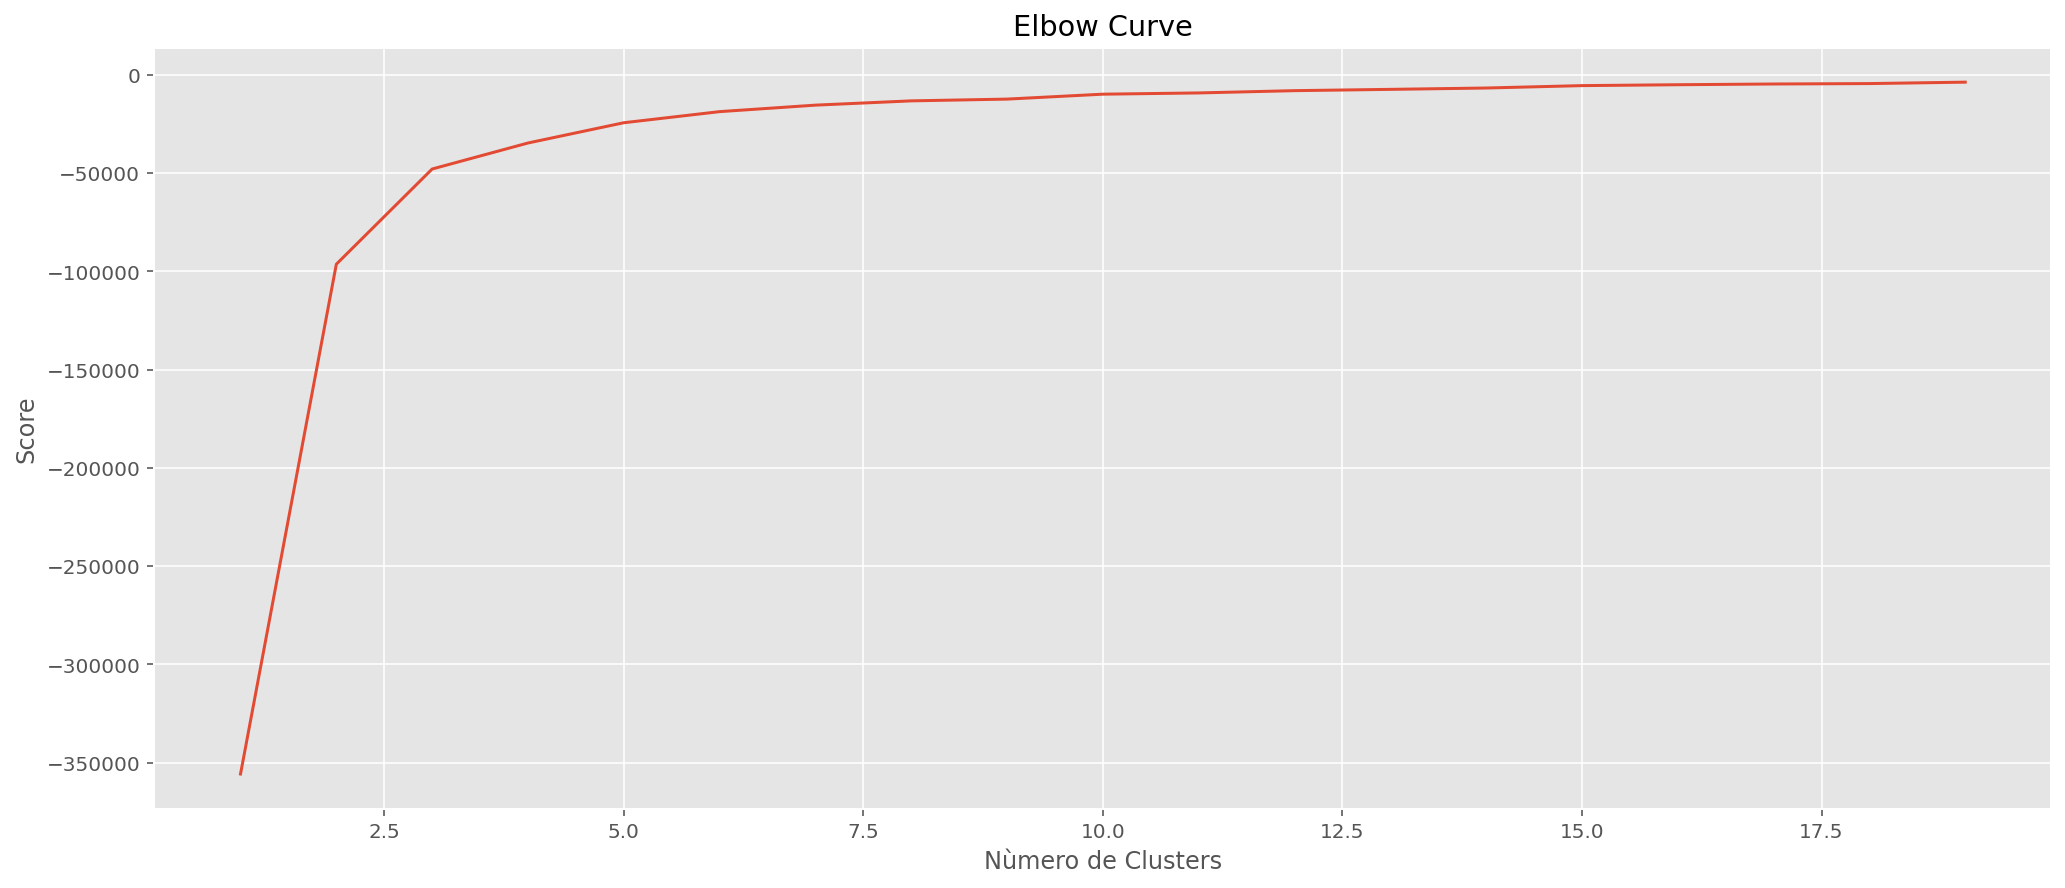

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Nùmero de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 11.8125     272.5625      28.375       68.3125    ]
 [  5.59       112.4         17.27        65.6       ]
 [  8.21428571 173.28571429  22.84285714  70.64285714]
 [  2.95        62.7         11.51        53.9       ]]


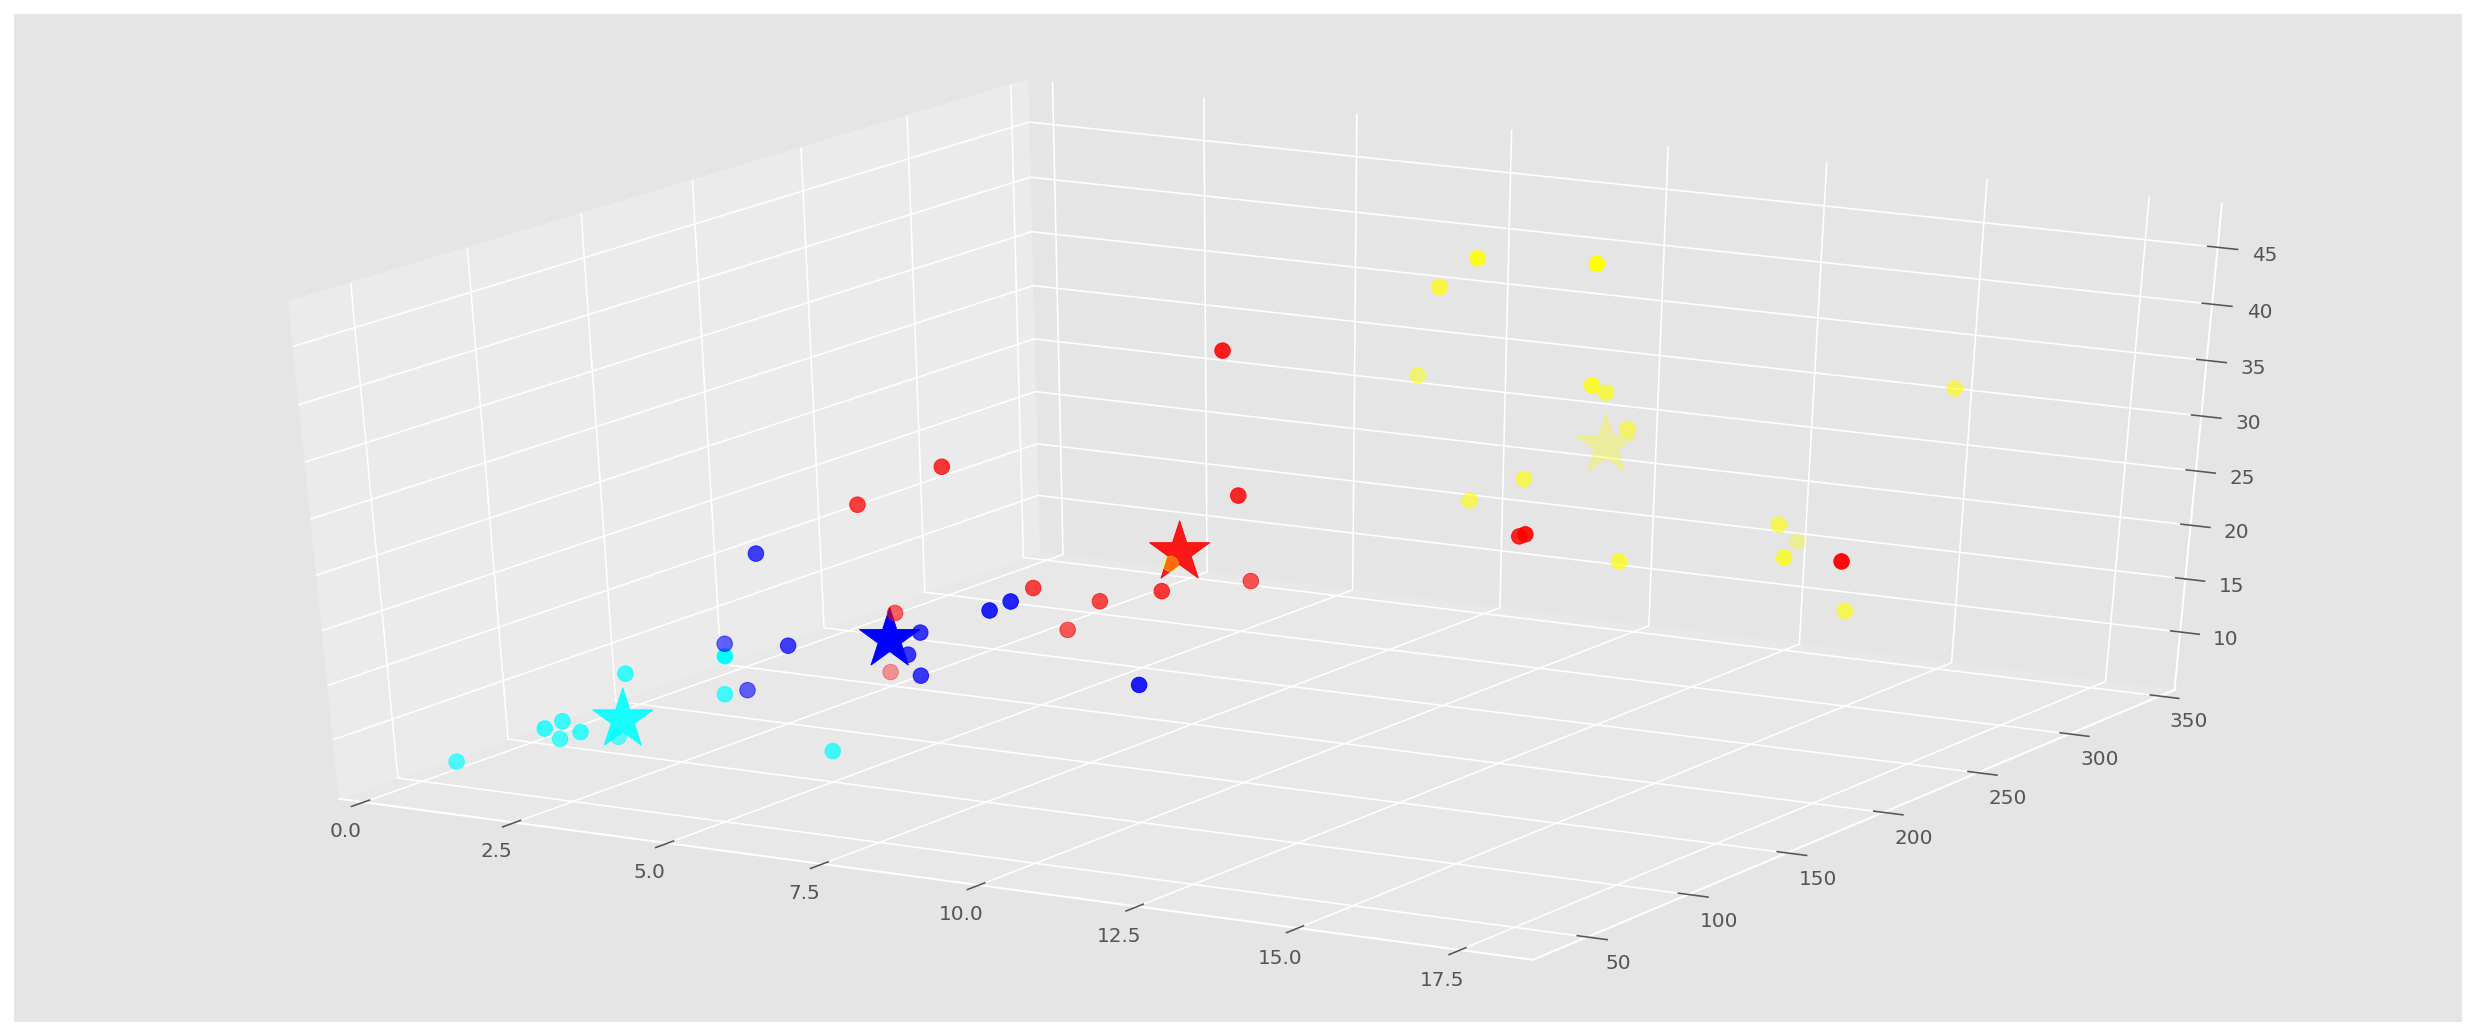

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['yellow','blue','red','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

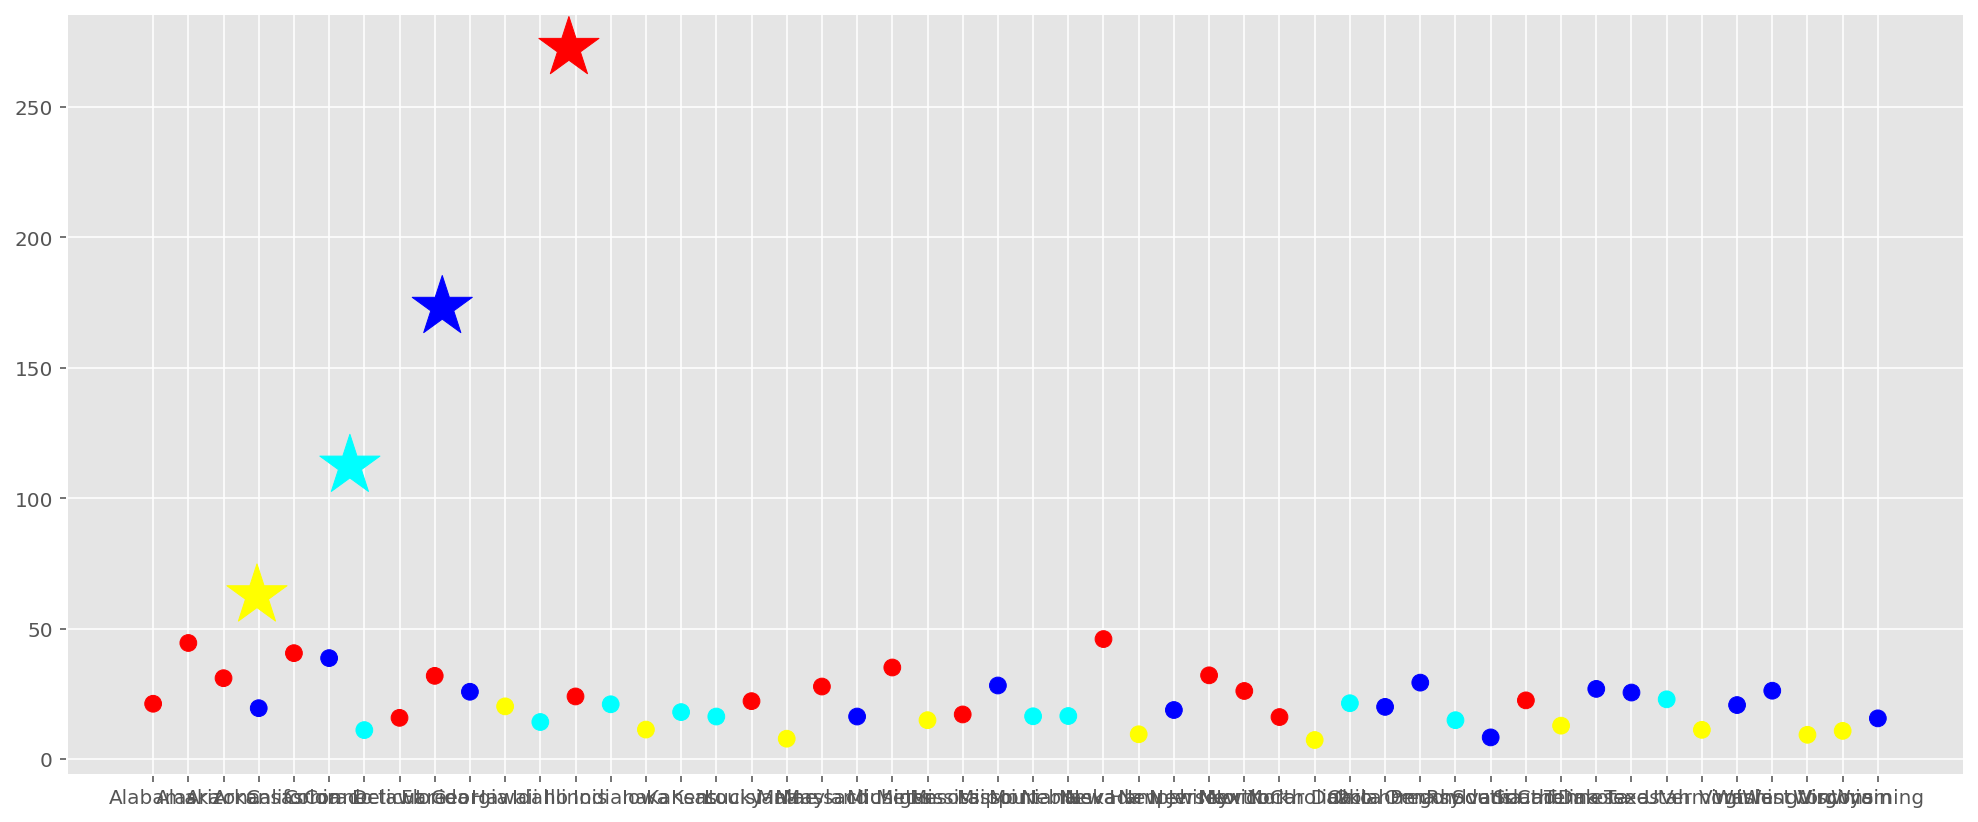

In [ ]:
# Getting the values and plotting it
f1 = dataframe['State'].values
f2 = dataframe['Rape'].values

 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

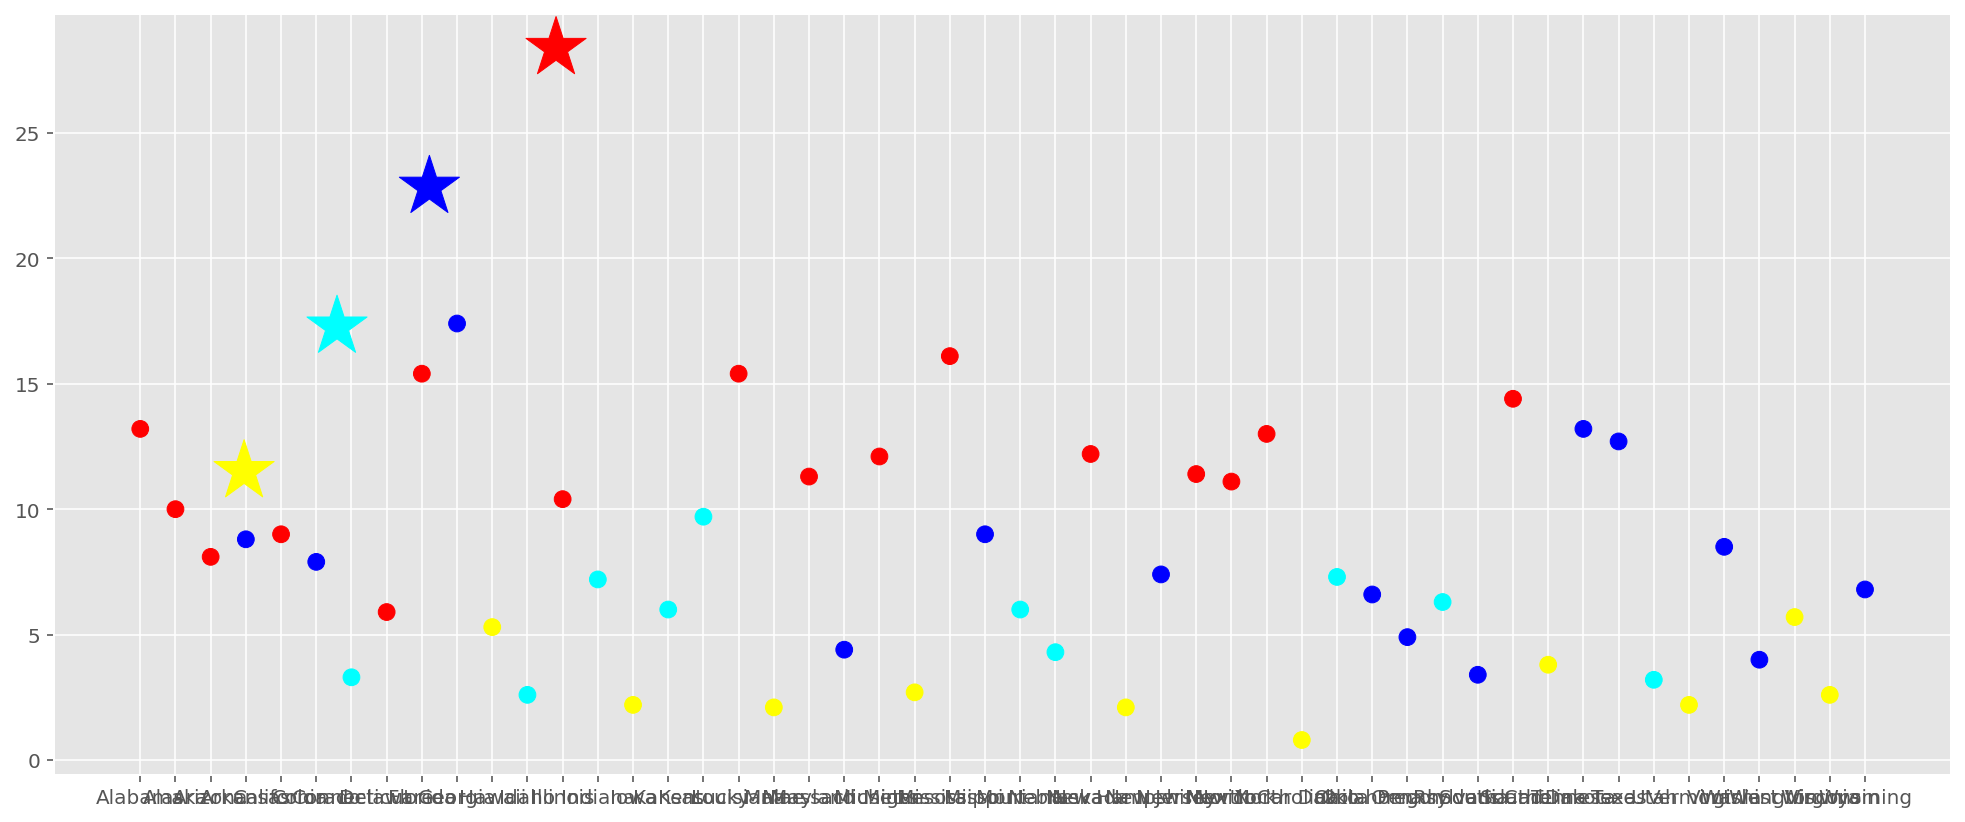

In [ ]:
f1 = dataframe['State'].values
f2 = dataframe['Murder'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

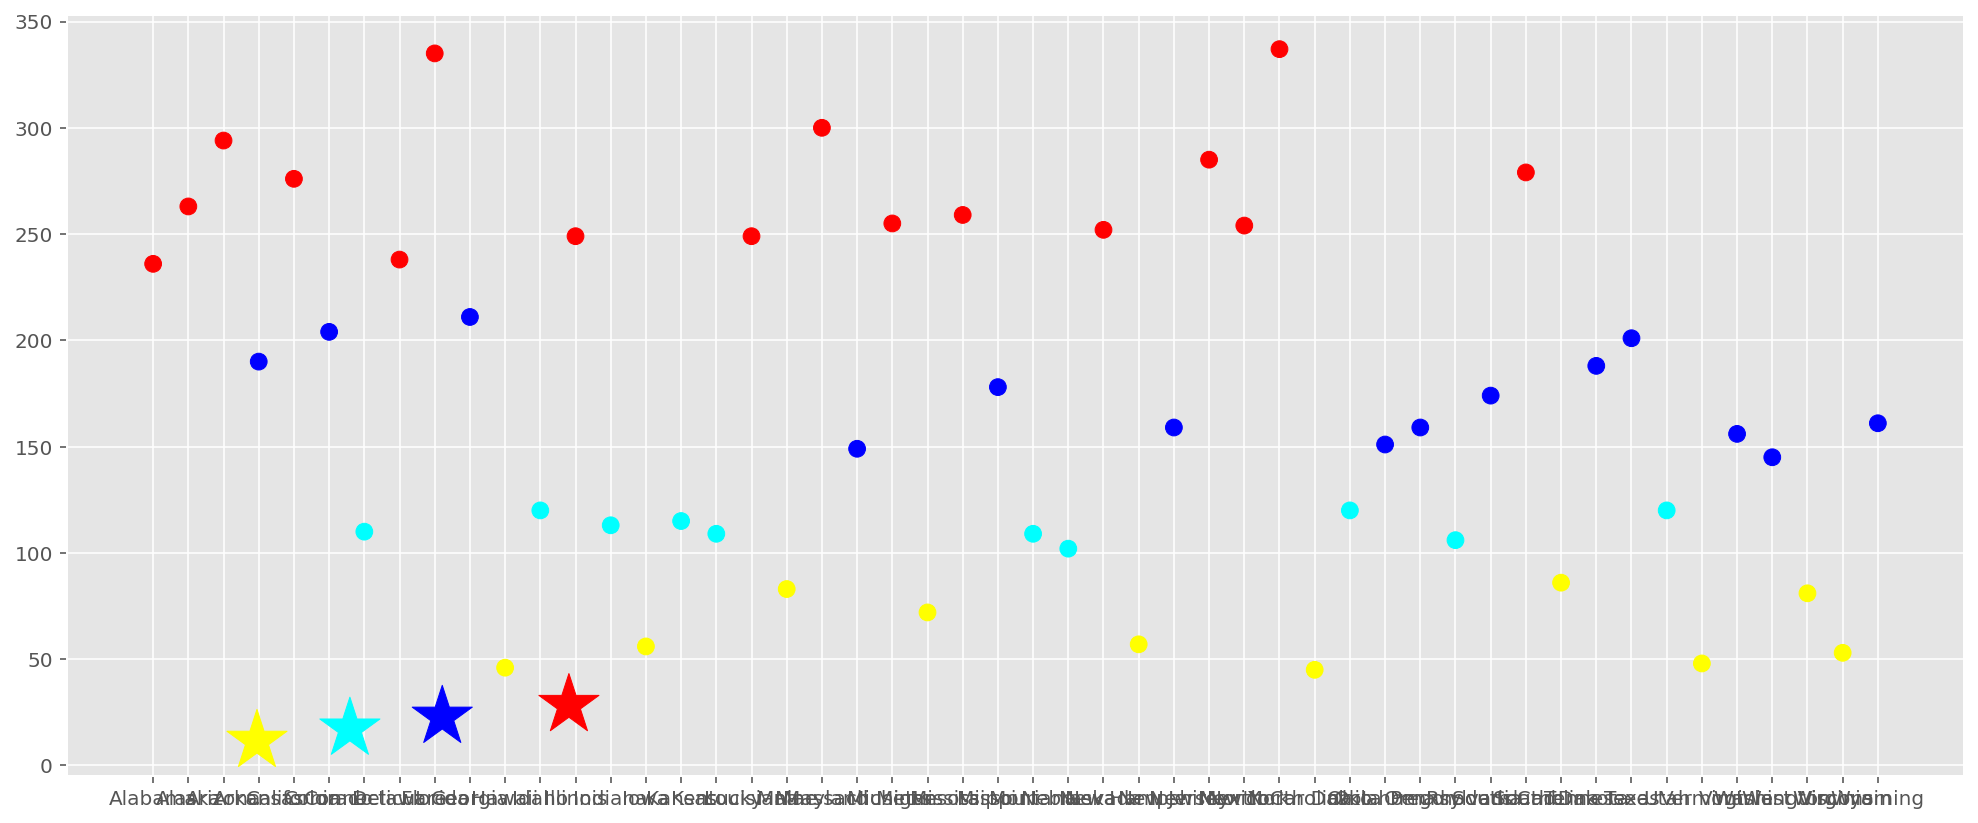

In [ ]:
f1 = dataframe['State'].values
f2 = dataframe['Assault'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

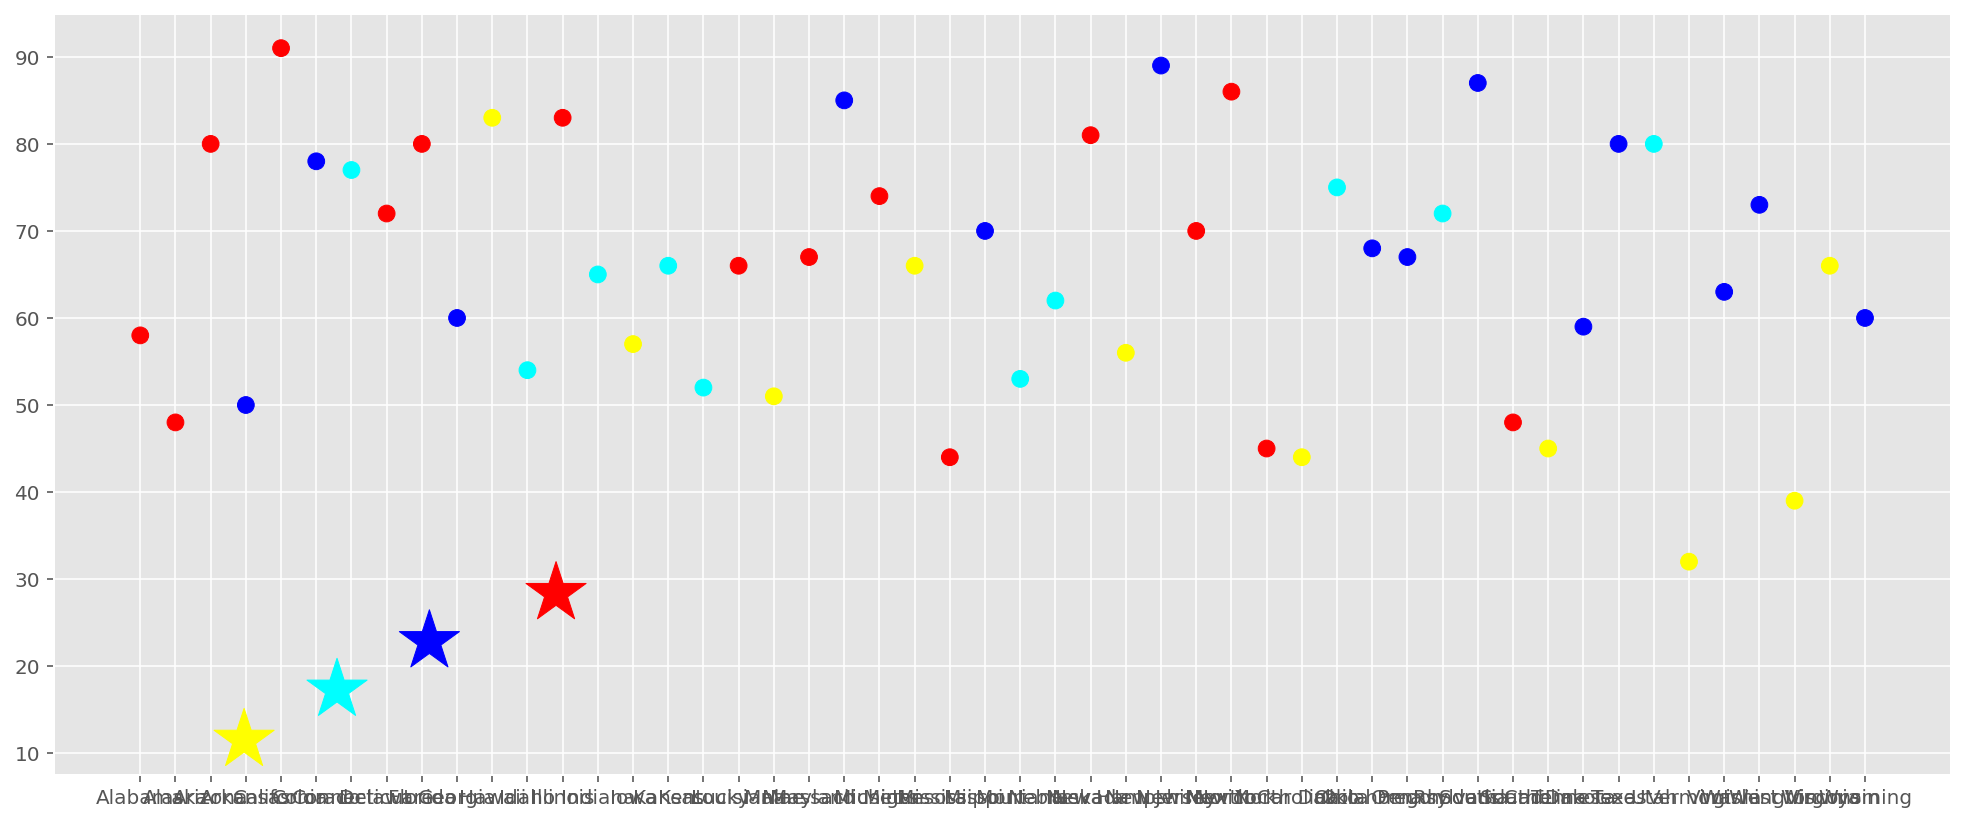

In [ ]:
f1 = dataframe['State'].values
f2 = dataframe['UrbanPop'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['Assault']=dataframe['Assault'].values
copy['Murder']=dataframe['Murder'].values
copy['UrbanPop']=dataframe['UrbanPop'].values
copy['Rape']=dataframe['Rape'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,yellow,10
1,blue,14
2,red,16
3,cyan,10


In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([28, 24, 30, 15])

In [ ]:
users=dataframe['State'].values
for row in closest:
    print(users[row])


New Hampshire
Missouri
New Mexico
Kansas


In [ ]:
val_corr_pearson = df_auto.corr(method="pearson")

#plt.matshow(val_corr_pearson)
val_corr_pearson.style.background_gradient(cmap='coolwarm').set_precision(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,Murder,Assault,UrbanPop,Rape
Murder,1.0000,0.8019,0.0696,0.5636
Assault,0.8019,1.0000,0.2589,0.6652
UrbanPop,0.0696,0.2589,1.0000,0.4113
Rape,0.5636,0.6652,0.4113,1.0000


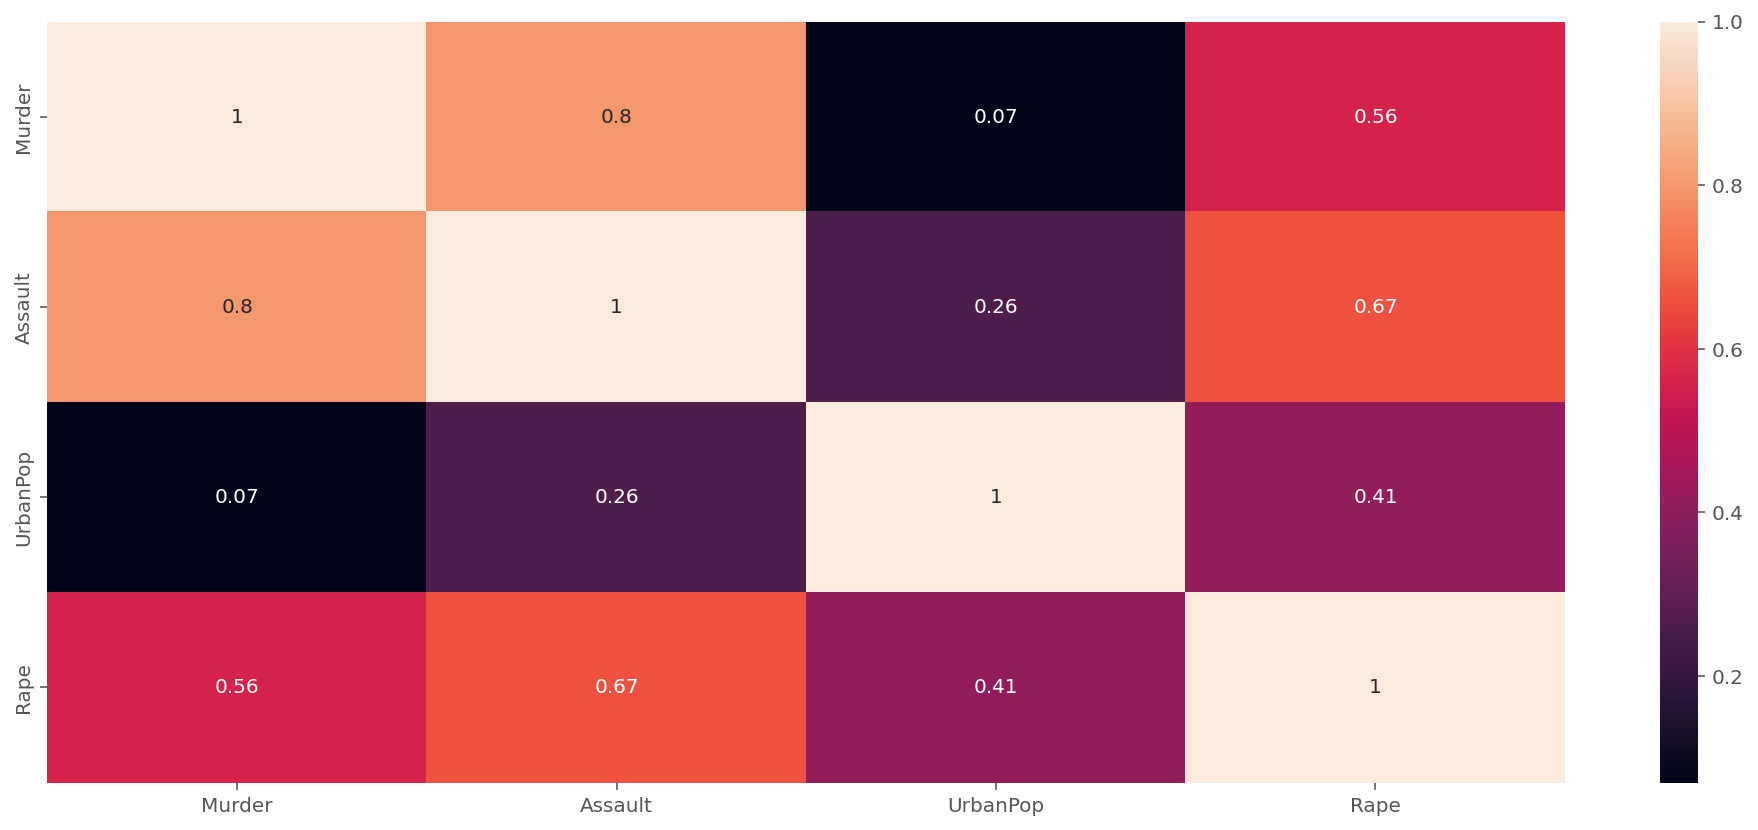

In [ ]:
import seaborn as sns

sns.heatmap(val_corr_pearson,  annot = True)